# **Giới thiệu**

## **Về nhóm**
Nhóm **Data Lord** gồm 4 thành viên:
- 19120625 - Nguyễn Hữu Phương 
- 18120278 - Phạm Hoàng Nam Anh
- 19120543 - Hoàng Mạnh Khiêm
- 19120522 - Phạm Quốc Hưng

## **Về đề tài**
Đề tài mà nhóm lựa chọn là Dự đoán tiến triển của bệnh Parkinson (Parkinson's Disease Progression Prediction).

Bệnh Parkinson là một bệnh gây rối loạn não làm ảnh hưởng đến khả năng đi lại, nhận thức, giấc ngủ và các chức năng bình thường khác. Hiện nay vẫn chưa có phương pháp nào có thể chữa trị hiệu quả căn bệnh này và bệnh sẽ ngày càng trầm trọng hơn theo thời gian. Các nghiên cứu cho thấy các đột biến protein và peptide đóng một vai trò quan trọng trong sự khởi phát và trầm trọng hóa của căn bệnh này.

**Bài toán:** Mục tiêu của đề tài này là dự đoán điểm MDS-UPDRS thông qua dữ liệu đo lường protein và peptide để xác định tiến triển của bệnh Parkinson. Thang điểm này gồm có 4 phần:
- **Phần 1:** Đánh giá các trải nghiệm không chuyển động trong cuộc sống hàng ngày của bệnh nhân Parkinson. Gồm 13 câu hỏi.
- **Phần 2:** Đánh giá các trải nghiệm chuyển động trong cuộc sống hàng ngày của bệnh nhân Parkinson. Gồm 13 câu hỏi.
- **Phần 3:** Đánh giá các khía cạnh chuyển động của bệnh Parkinson trong khi thực hiện các hoạt động hàng ngày. Gồm 18 câu hỏi.
- **Phần 4:** Đánh giá các biến chứng chuyển động của bệnh Parkinson. Gồm 6 câu hỏi.

Mỗi câu hỏi được đánh giá trên thang điểm 0 - 4: 0 (bình thường - normal), 1 (nhẹ - slight), 2 (trung bình - mild), 3 (nặng - moderate) và 4 (rất nặng - severe).

**Ứng dụng, ý nghĩa khoa học và thực tiễn:**

Việc thực hiện đề tài này sẽ giúp dự đoán tiến triển của bệnh Parkinson thông qua dữ liệu đo lường protein và peptide. Điều này sẽ hỗ trợ các bác sĩ và các nhà nghiên cứu trong việc tìm hiểu, nghiên cứu chuyên sâu hơn về căn bệnh này. 

Bên cạnh đó, có thể tìm được các giải pháp để làm chậm tiến triển, hạn chế ảnh hưởng của căn bệnh tới người mắc phải. Thậm chí chữa trị dứt điểm bệnh Parkinson.


## **Về tập dữ liệu**
Các tập dữ liệu mà nhóm sử dụng được thu thập từ Competition [AMP®-Parkinson's Disease Progression Prediction](https://www.kaggle.com/competitions/amp-parkinsons-disease-progression-prediction) trên trang Kaggle. 

Gồm 3 tập dữ liệu *train_peptides.csv*, *train_proteins.csv* và *train_clinical_data.csv*. Chi tiết về các tập dữ liệu sẽ được trình bày bên dưới.

# **Thư viện**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re 

import scipy.stats as stats

In [2]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow_decision_forests as tfdf

In [4]:
plt.rcParams['figure.figsize'] = [12,8]
sns.set_theme()

# **Tải và đọc các tập dữ liệu**



In [5]:
!gdown https://drive.google.com/drive/folders/1OL53up22m7ykFMvE9XVGMBSq-v0Mg-RA?usp=sharing -O /content/data --folder

Retrieving folder list
Processing file 1QtL8mTFjokTqvAeVpBbjgFEZ16YpWB6X train_clinical_data.csv
Processing file 18lMzGXyWxkzRiJcydYC2vG4s7W7LLnNL train_peptides.csv
Processing file 1uJ-N328rCDEsMh0k5_xySRXwvAzT4OmJ train_proteins.csv
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1QtL8mTFjokTqvAeVpBbjgFEZ16YpWB6X
To: /content/data/train_clinical_data.csv
100% 74.1k/74.1k [00:00<00:00, 72.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=18lMzGXyWxkzRiJcydYC2vG4s7W7LLnNL
To: /content/data/train_peptides.csv
100% 51.4M/51.4M [00:00<00:00, 86.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uJ-N328rCDEsMh0k5_xySRXwvAzT4OmJ
To: /content/data/train_proteins.csv
100% 7.66M/7.66M [00:00<00:00, 53.4MB/s]
Download completed


In [6]:
peptides_df = pd.read_csv('/content/data/train_peptides.csv')
proteins_df = pd.read_csv('/content/data/train_proteins.csv')
clinical_df = pd.read_csv('/content/data/train_clinical_data.csv')

# **Chuẩn bị dữ liệu**

## **Dữ liệu peptides**

### **Dữ liệu có bị thiếu hay không?**


In [7]:
peptides_df.isna().mean().sort_values(ascending = False).round(4) * 100

visit_id            0.0
visit_month         0.0
patient_id          0.0
UniProt             0.0
Peptide             0.0
PeptideAbundance    0.0
dtype: float64

**Nhận xét:** Không có cột thuộc tính nào bị thiếu dữ liệu.

### **Dữ liệu có bị lặp hay không?**

In [8]:
peptides_df.duplicated().sum()

0

**Nhận xét:** Không có dòng dữ liệu nào bị lặp.

##Dữ liệu protein

### **Dữ liệu có bị thiếu hay không?**


In [9]:
proteins_df.isna().mean().sort_values(ascending = False).round(4) * 100

visit_id       0.0
visit_month    0.0
patient_id     0.0
UniProt        0.0
NPX            0.0
dtype: float64

**Nhận xét:** Không có cột thuộc tính nào bị thiếu dữ liệu.

### **Dữ liệu có bị lặp hay không?**

In [10]:
proteins_df.duplicated().sum()

0

**Nhận xét:** Không có dòng dữ liệu nào bị lặp.

##Dữ liệu khám lâm sàng

### **Dữ liệu có bị thiếu hay không?**


In [11]:
clinical_df.isna().mean().sort_values(ascending = False).round(4) * 100

upd23b_clinical_state_on_medication    50.75
updrs_4                                39.69
updrs_3                                 0.96
updrs_2                                 0.08
updrs_1                                 0.04
visit_id                                0.00
patient_id                              0.00
visit_month                             0.00
dtype: float64

**Nhận xét:** Tập dữ liệu có một số cột bị thiếu dữ liệu, trong đó có 2 cột có tỉ lệ dữ liệu thiếu cao nhất lần lượt là 50.75% và 39.69%.

#### **Xử lý dữ liệu bị thiếu**

Vì tỉ lệ thiếu ở các cột updrs_1, updrs_2, updrs_3 là nhỏ và không đáng kể. Ta sẽ xoá đi các dòng có chứa dữ liệu thiếu ở các cột này.

In [12]:
clinical_df.dropna(subset = ['updrs_1', 'updrs_2', 'updrs_3'], inplace = True)
clinical_df.isna().mean().sort_values(ascending = False).round(4) * 100

upd23b_clinical_state_on_medication    50.54
updrs_4                                39.64
visit_id                                0.00
patient_id                              0.00
visit_month                             0.00
updrs_1                                 0.00
updrs_2                                 0.00
updrs_3                                 0.00
dtype: float64

Thay dữ liệu thiếu ở cột "upd23b_clinical_state_on_medication" thành giá trị "Unknow"

In [13]:
clinical_df['upd23b_clinical_state_on_medication'].fillna(value = 'Unknow', inplace = True)
clinical_df.isna().mean().sort_values(ascending = False).round(4) * 100

updrs_4                                39.64
visit_id                                0.00
patient_id                              0.00
visit_month                             0.00
updrs_1                                 0.00
updrs_2                                 0.00
updrs_3                                 0.00
upd23b_clinical_state_on_medication     0.00
dtype: float64

Về cột `updrs_4` là cột target cần dự đoán nên việc sử dụng các phương pháp điền dữ liệu ở cột này có thể gây ảnh hưởng tới kết quả dự đoán nên tạm thời sẽ giữ nguyên cột này.

### **Dữ liệu có bị lặp hay không?**

In [14]:
clinical_df.duplicated().sum()

0

**Nhận xét:** Không có dòng dữ liệu nào bị lặp.

# **Khám phá dữ liệu**

## **Dữ liệu peptide**

Tập dữ liệu này chứa dữ liệu phổ khối lượng ở mức peptide, là các đơn vị thành phần của protein. Dữ liệu này giúp nắm bắt sự thay đổi về cấu trúc của protein trong quá trình tiến triển của bệnh Parkinson.


In [15]:
peptides_df.head(5)

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


### **Tập dữ liệu có bao nhiêu hàng và cột?**

In [16]:
peptides_df.shape

(981834, 6)

**Nhận xét:** Tập dữ liệu có 981834 hàng và 6 cột thuộc tính.

Mô tả về các trường của tập dữ liệu:

|Tên cột|Ý nghĩa|
|---|---|
|**visit_id**|Mã id của lần khám|
|**month_id**|Tháng khám, tính từ thời điểm lần đầu bệnh nhân đến khám|
|**patient_id**|Mã bệnh nhân|
|**UniProt**|Mã UniProt của protein dùng để phân biệt các loại protein. Mỗi protein thường có nhiều loại peptide|
|**Peptide**|Chuỗi animo acids có trong peptide. Được kí hiệu bằng các mã chữ cái|
|**PeptideAbundance**|Tần suất xuất hiện của amino acids trong tập mẫu|

### **Các cột và kiểu dữ liệu của các cột**

In [17]:
peptides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981834 entries, 0 to 981833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   visit_id          981834 non-null  object 
 1   visit_month       981834 non-null  int64  
 2   patient_id        981834 non-null  int64  
 3   UniProt           981834 non-null  object 
 4   Peptide           981834 non-null  object 
 5   PeptideAbundance  981834 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 44.9+ MB


**Nhận xét:** Tập dữ liệu có 3 cột kiểu số (`int64`, `float64`) và 3 cột kiểu `object`.

### **Mô tả thống kê**

In [18]:
numerical_features = ['visit_month', 'PeptideAbundance']
round(peptides_df[numerical_features].describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
visit_month,981834.0,26.11,22.91,0.0,6.00,24.0,48.00,108.0
PeptideAbundance,981834.0,642890.25,3377989.09,11.0,28174.25,74308.3,221338.75,178752000.0


In [19]:
categorical_features = ['UniProt', 'Peptide']

def count(s):
  return s.count();
def unique(s):
  return s.nunique()
def unique_vals(s):
  return s.dropna().astype('object').unique()
def top(s):
  return s.mode()[0]

peptides_df[categorical_features].agg([count, unique, unique_vals, top])

,UniProt,Peptide
count,981834,981834
unique,227,968
unique_vals,"[O00391, O00533, O00584, O14498, O14773, O1479...","[NEQEQPLGQWHLS, GNPEPTFSWTK, IEIPSSVQQVPTIIK, ..."
top,P02787,AIGYLNTGYQR


Một số **Peptide** có thêm mã **UniMod_X**. Trong dữ liệu có 2 mã là **UniMod_4** và **UniMod_25**. Theo nhóm tìm hiểu 2 mã này có nghĩa là:
- **UniMod_4** trong mã Uniprot là mã của một biến thể bổ sung của axit amin Methionine (Met) gọi là Oxidation, nó được sử dụng để chỉ ra rằng Met đã bị oxy hóa trong chuỗi polypeptide.
- **UniMod_35** trong mã Uniprot là mã của một biến thể bổ sung của axit amin Serine (Ser) gọi là Phosphorylation, nó được sử dụng để chỉ ra rằng Ser đã được phosphory hóa trong chuỗi polypeptide.


In [20]:
peptides_df[peptides_df['Peptide'].apply(lambda x: 'UniMod_4' in x or 'UniMod_35' in x)][['visit_id', 'visit_month', 'patient_id', 'Peptide']].head(10)

,visit_id,visit_month,patient_id,Peptide
3,55_0,0,55,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK
10,55_0,0,55,HGTC(UniMod_4)AAQVDALNSQKK
19,55_0,0,55,NIINSDGGPYVC(UniMod_4)R
24,55_0,0,55,SEGLLAC(UniMod_4)GTNAR
30,55_0,0,55,EVGPTNADPVC(UniMod_4)LAK
35,55_0,0,55,MYYSAVDPTKDIFTGLIGPM(UniMod_35)K
39,55_0,0,55,DKLAAC(UniMod_4)LEGNC(UniMod_4)AEGLGTNYR
41,55_0,0,55,LAVTTHGLPC(UniMod_4)LAWASAQAK
42,55_0,0,55,RQEC(UniMod_4)SIPVC(UniMod_4)GQDQVTVAMTPR
43,55_0,0,55,SEGSSVNLSPPLEQC(UniMod_4)VPDRGQQYQGR


## **Dữ liệu protein**

Tập dữ liệu chứa tần suất biểu hiện protein được tổng hợp từ tập dữ liệu mức peptide. Dữ liệu này giúp nắm bắt sự thay đổi về mức độ biểu hiện của các protein liên quan đến bệnh Parkinson.  

In [21]:
proteins_df.head(5)

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


### **Tập dữ liệu có bao nhiêu hàng và cột?**

In [22]:
proteins_df.shape

(232741, 5)

**Nhận xét:** Tập dữ liệu có 232741 hàng và 5 cột thuộc tính.

Mô tả về các trường của tập dữ liệu:

|Tên cột|Ý nghĩa|
|---|---|
|**visit_id**|Mã id của lần khám|
|**month_id**|Tháng khám, tính từ thời điểm lần đầu bệnh nhân đến khám|
|**patient_id**|Mã bệnh nhân|
|**UniProt**|Mã UniProt của protein dùng để phân biệt các loại protein. Mỗi protein thường có nhiều loại peptide|
|**NPX**|Tần suất xuất hiện của protein trong mẫu.|

### **Các cột và kiểu dữ liệu của các cột**

In [23]:
proteins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232741 entries, 0 to 232740
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   visit_id     232741 non-null  object 
 1   visit_month  232741 non-null  int64  
 2   patient_id   232741 non-null  int64  
 3   UniProt      232741 non-null  object 
 4   NPX          232741 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.9+ MB


**Nhận xét:** Tập dữ liệu có 3 cột kiểu số (`int64`, `float64`) và 2 kiểu `object`.

### **Mô tả thống kê**

In [24]:
numerical_features = ['visit_month', 'NPX']
round(proteins_df[numerical_features].describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
visit_month,232741.0,26.10,22.87,0.00,6.0,24.0,48.0,108.0
NPX,232741.0,2712076.94,22241547.32,84.61,29464.4,113556.0,563894.0,613851000.0


In [25]:
categorical_features = ['UniProt']

def count(s):
  return s.count();
def unique(s):
  return s.nunique()
def unique_vals(s):
  return s.dropna().astype('object').unique()
def top(s):
  return s.mode()[0]

proteins_df[categorical_features].agg([count, unique, unique_vals, top])

,UniProt
count,232741
unique,227
unique_vals,"[O00391, O00533, O00584, O14498, O14773, O1479..."
top,O15240


##Dữ liệu khám lâm sàng của các bệnh nhân

Tập dữ liệu chứa thông tin khám lâm sàng của các bệnh nhân, bao gồm các chỉ số đánh giá tiến triển của bệnh qua thời gian. Thông tin này giúp nắm bắt sự thay đổi về chức năng và các biến chứng của bệnh nhân trong quá trình tiến triển của bệnh Parkinson.  

In [26]:
clinical_df.head(5)

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,Unknow
1,55_3,55,3,10.0,7.0,25.0,NaN,Unknow
2,55_6,55,6,8.0,10.0,34.0,NaN,Unknow
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


### **Tập dữ liệu có bao nhiêu hàng và cột?**

In [27]:
clinical_df.shape

(2588, 8)

**Nhận xét:** Tập dữ liệu có 2588 hàng và 8 cột thuộc tính.


Mô tả về các trường của tập dữ liệu.

|Tên cột|Ý nghĩa|
|---|---|
|**visit_id**|Mã id của lần khám|
|**month_id**|Tháng khám, tính từ thời điểm lần đầu bệnh nhân đến khám|
|**patient_id**|Mã bệnh nhân|
|**updrs_n**|Điểm của bệnh nhân tương ứng với 4 phần theo MDS-UPDRS ([Unified Parkinson's Disease Rating Scale](https://www.movementdisorders.org/MDS/MDS-Rating-Scales/MDS-Unified-Parkinsons-Disease-Rating-Scale-MDS-UPDRS.htm)). Điểm càng cao thì triệu chứng bệnh càng nghiêm trọng.|
|**upd23b_clinical_state_on_medication**|Việc bệnh nhân có sử dụng thuốc (VD: Levodopa) trong quá trình đánh giá UDPRS không?|

### **Các cột và kiểu dữ liệu của các cột**

In [28]:
clinical_df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2588 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2588 non-null   object 
 1   patient_id                           2588 non-null   int64  
 2   visit_month                          2588 non-null   int64  
 3   updrs_1                              2588 non-null   float64
 4   updrs_2                              2588 non-null   float64
 5   updrs_3                              2588 non-null   float64
 6   updrs_4                              1562 non-null   float64
 7   upd23b_clinical_state_on_medication  2588 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 182.0+ KB


**Nhận xét:** Tập dữ liệu có 6 cột kiểu số (`int64`, `float64`) và 2 cột kiểu `object`.

### **Mô tả thống kê**

In [29]:
numerical_features = ['visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
round(clinical_df[numerical_features].describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
visit_month,2588.0,31.04,25.10,0.0,9.0,24.0,48.0,108.0
updrs_1,2588.0,7.11,5.52,0.0,3.0,6.0,10.0,33.0
updrs_2,2588.0,6.73,6.34,0.0,1.0,5.0,10.0,40.0
updrs_3,2588.0,19.43,15.00,0.0,6.0,19.0,29.0,86.0
updrs_4,1562.0,1.87,3.02,0.0,0.0,0.0,3.0,20.0


In [30]:
categorical_features = ['upd23b_clinical_state_on_medication']

def count(s):
  return s.count();
def unique(s):
  return s.nunique()
def unique_vals(s):
  return s.dropna().astype('object').unique()
def top(s):
  return s.mode()[0]

clinical_df[categorical_features].agg([count, unique, unique_vals, top])

,upd23b_clinical_state_on_medication
count,2588
unique,3
unique_vals,"[Unknow, On, Off]"
top,Unknow


# **Trực quan hóa dữ liệu**

## **Dữ liệu peptide**

### **Phân bố của các cột dữ liệu kiểu số**

In [31]:
numerical_features = ['visit_month', 'PeptideAbundance']

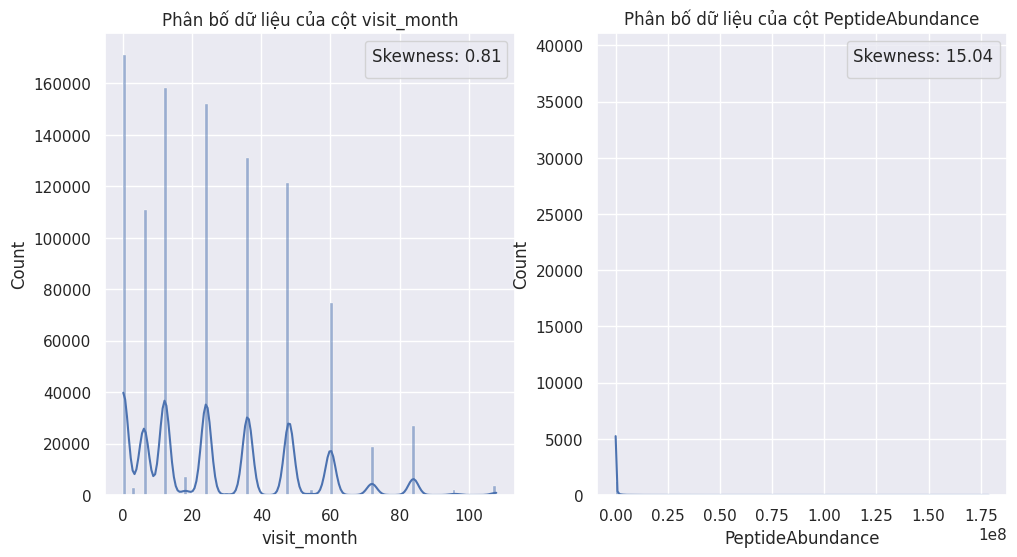

In [32]:
nrows = 1
ncols = 3

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(numerical_features):
    fig.add_subplot(nrows, ncols, i + 1)
    skewness = peptides_df[col].skew()
    plt.legend(loc = 'best', labels = ['_'], title = 'Skewness: %.2f'%(skewness))
    sns.histplot(data= peptides_df, x= col, kde= True, legend= True)
    plt.title(f'Phân bố dữ liệu của cột {col}')
plt.show()

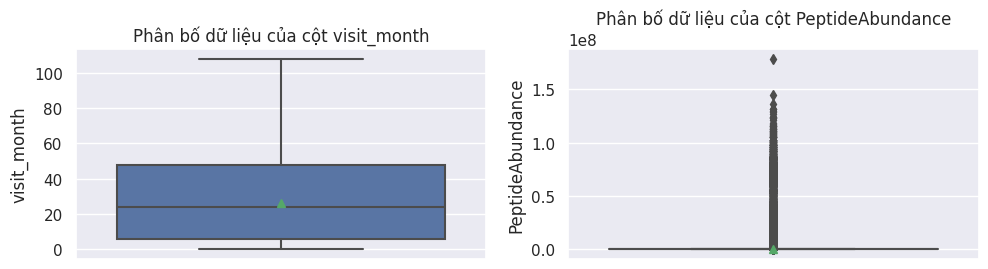

In [33]:
nrows = 2
ncols = 3

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(numerical_features):
    fig.add_subplot(nrows, ncols, i + 1)
    sns.boxplot(data= peptides_df, y= col, showmeans= True)
    plt.title(f'Phân bố dữ liệu của cột {col}')
plt.show()

### **Phân bố của các cột dữ liệu kiểu object**

In [34]:
categorical_features = ['UniProt', 'Peptide']

#### **Top 20 mã Uniprot Protein xuất hiện nhiều nhất**

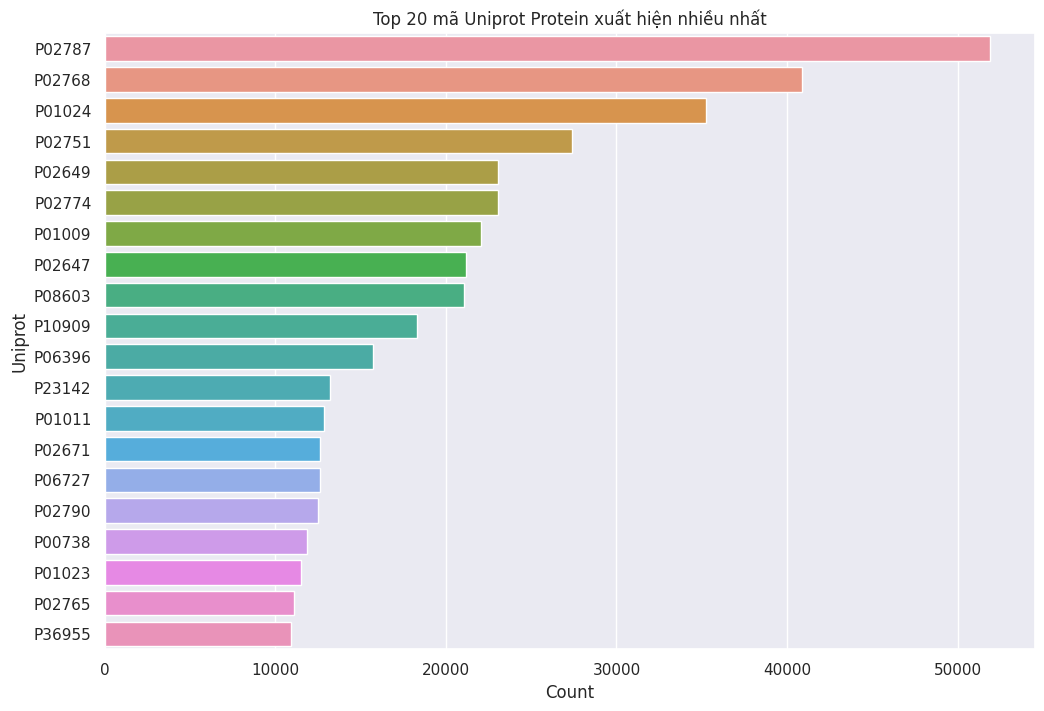

In [35]:
data = peptides_df.groupby(['UniProt'])['UniProt'].agg('count').nlargest(20).sort_values(ascending= False)
sns.barplot(x= data, y= data.index)
plt.xlabel('Count')
plt.ylabel('Uniprot')
plt.title('Top 20 mã Uniprot Protein xuất hiện nhiều nhất')
plt.show()

#### **Top 20 Peptide xuất hiện nhiều nhất**



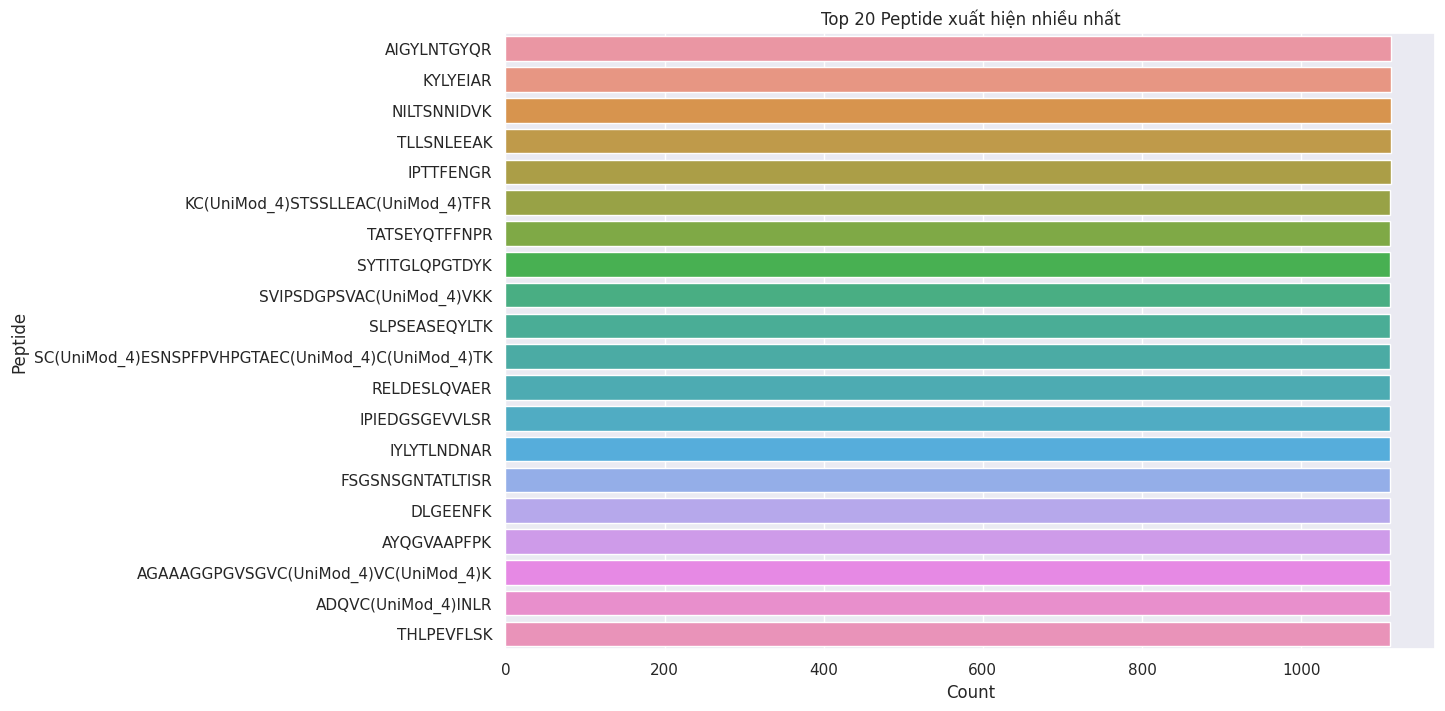

In [36]:
data = peptides_df.groupby(['Peptide'])['Peptide'].agg('count').nlargest(20).sort_values(ascending= False)
sns.barplot(x= data, y= data.index)
plt.xlabel('Count')
plt.ylabel('Peptide')
plt.title('Top 20 Peptide xuất hiện nhiều nhất')
plt.show()

### **Tương quan giữa các cột dữ liệu**

<ipython-input-37-6cea649918ea>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data= peptides_df.corr(method= 'pearson'), cmap="YlGnBu", annot= True)


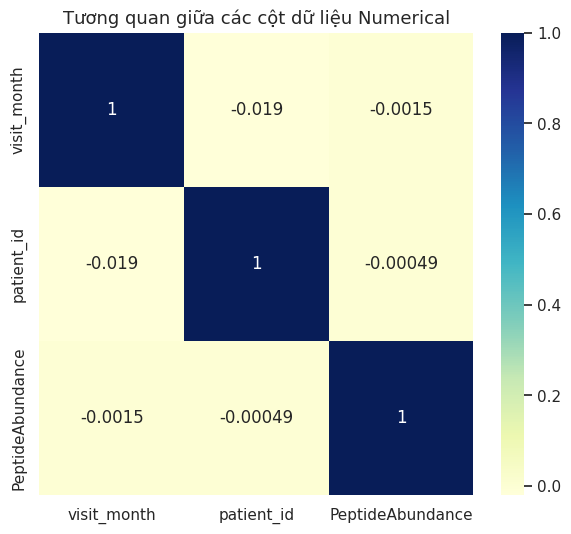

In [37]:
plt.figure(figsize= (7, 6))
plt.title('Tương quan giữa các cột dữ liệu Numerical', fontsize= 13)
sns.heatmap(data= peptides_df.corr(method= 'pearson'), cmap="YlGnBu", annot= True)
plt.show()

### **Mối quan hệ giữa các cột dữ liệu**

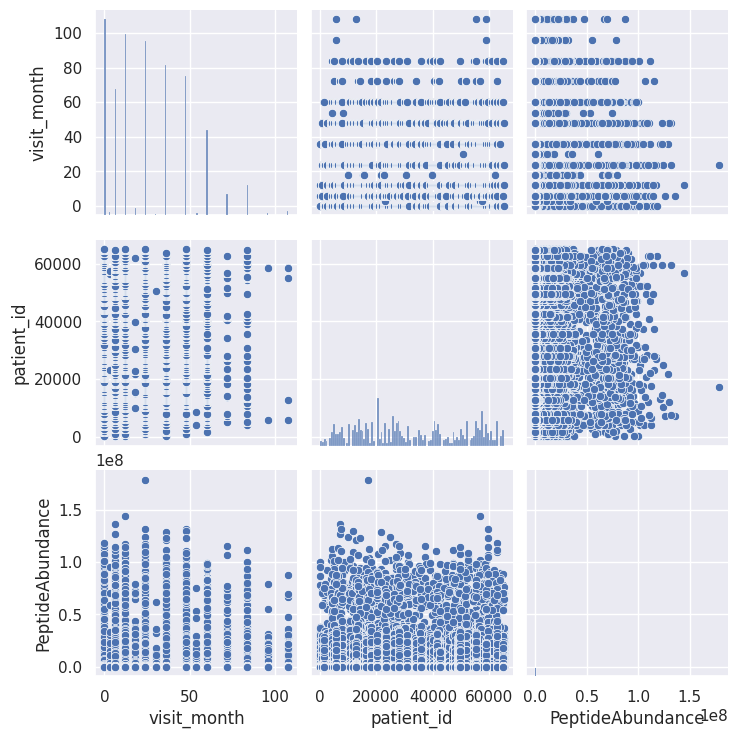

In [38]:
sns.pairplot(peptides_df)
plt.show()

### **Những amino acid nào xuất hiện nhiều nhất?**

Amino acid là thành phần của Peptide. Peptide là những hợp chất chứa từ 2 đến 50 gốc α - amino acid liên kết với nhau bằng các liên kết peptide. Dưới đây là 20 nhóm amino acid phổ biến:
- Alanine (Ala): A
- Arginine (Arg): R
- Asparagine (Asn): N
- Aspartic acid (Asp): D
- Cysteine (Cys): C
- Glutamine (Gln): Q
- Glutamic acid (Glu): E
- Glycine (Gly): G
- Histidine (His): H
- Isoleucine (Ile): I
- Leucine (Leu): L
- Lysine (Lys): K
- Methionine (Met): M
- Phenylalanine (Phe): F
- Proline (Pro): P
- Serine (Ser): S
- Threonine (Thr): T
- Tryptophan (Trp): W
- Tyrosine (Tyr): Y
- Valine (Val): V


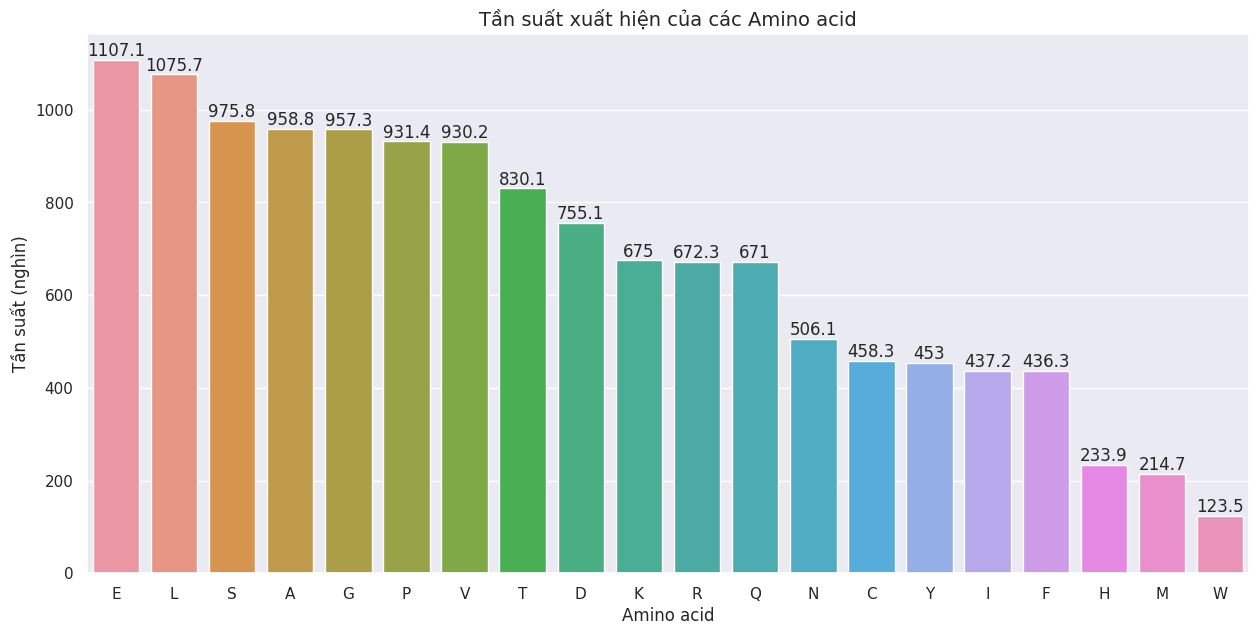

In [39]:
acid_counts = np.round(peptides_df['Peptide'].str.replace(r'\(UniMod_\d+\)', '', regex= True).apply(lambda x: list(x)).explode().value_counts() / 1000, 1)
plt.figure(figsize= (15, 7))
ax = sns.barplot(x= acid_counts.index, y= acid_counts.values)
ax.bar_label(ax.containers[0])
plt.title('Tần suất xuất hiện của các Amino acid', fontsize= 14)
plt.xlabel('Amino acid')
plt.ylabel('Tần suất (nghìn)')
plt.show()

## **Dữ liệu protein**

### **Phân bố của các cột dữ liệu kiểu số**

In [40]:
numerical_features = ['visit_month', 'NPX']

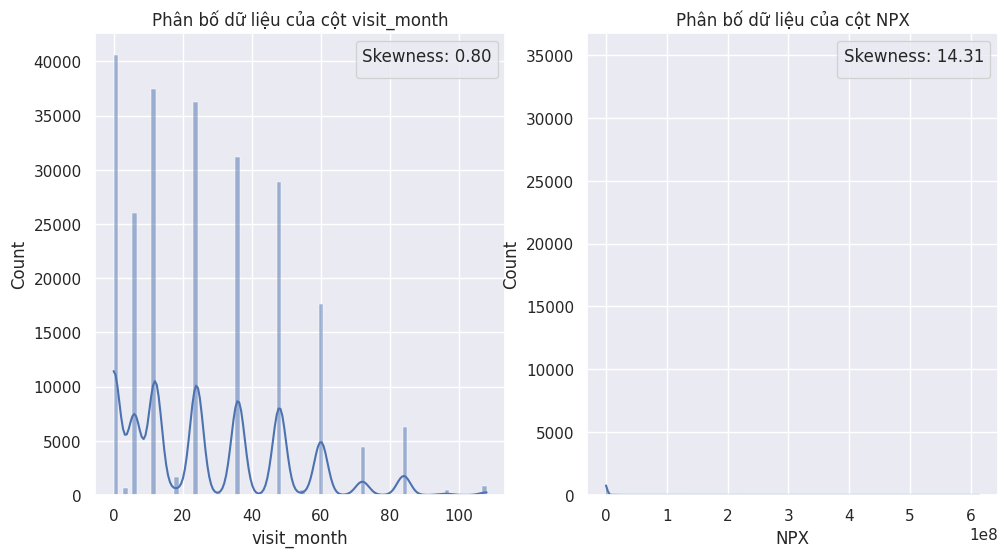

In [41]:
nrows = 1
ncols = 3

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(numerical_features):
    fig.add_subplot(nrows, ncols, i + 1)
    skewness = proteins_df[col].skew()
    plt.legend(loc = 'best', labels = ['_'], title = 'Skewness: %.2f'%(skewness))
    sns.histplot(data= proteins_df, x= col, kde= True, legend= True)
    plt.title(f'Phân bố dữ liệu của cột {col}')
plt.show()

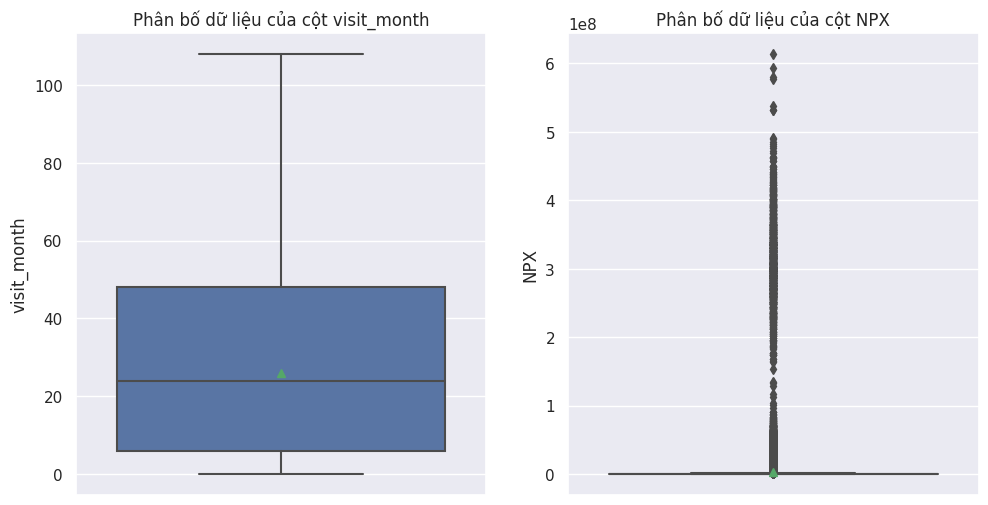

In [42]:
nrows = 1
ncols = 3

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(numerical_features):
    fig.add_subplot(nrows, ncols, i + 1)
    sns.boxplot(data= proteins_df, y= col, showmeans= True)
    plt.title(f'Phân bố dữ liệu của cột {col}')
plt.show()

### **Phân bố của các cột dữ liệu kiểu object**

In [43]:
categorical_features = ['UniProt']

#### **Top 20 mã Uniprot Protein xuất hiện nhiều nhất**

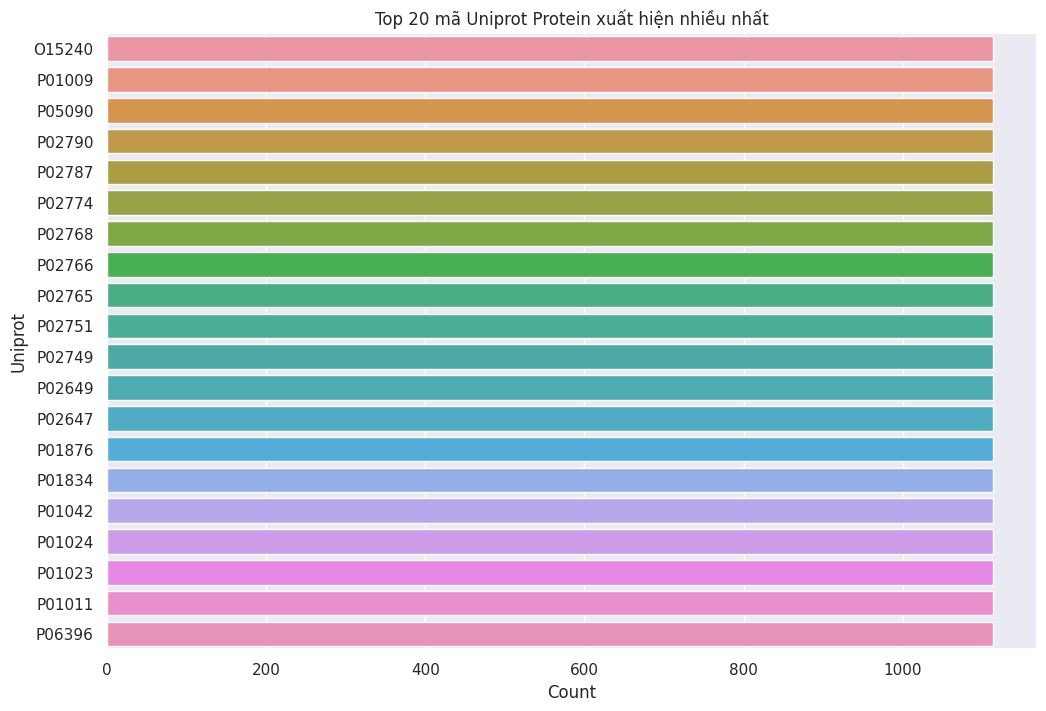

In [44]:
data = proteins_df.groupby(['UniProt'])['UniProt'].agg('count').nlargest(20).sort_values(ascending= False)
sns.barplot(x= data, y= data.index)
plt.xlabel('Count')
plt.ylabel('Uniprot')
plt.title('Top 20 mã Uniprot Protein xuất hiện nhiều nhất')
plt.show()

### **Tương quan giữa các cột dữ liệu**

<ipython-input-45-44853d2dc6d8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data= proteins_df.corr(method= 'pearson'), cmap="YlGnBu", annot= True)


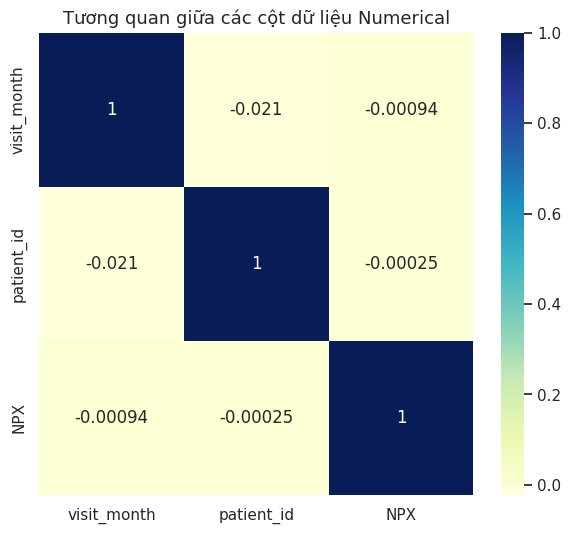

In [45]:
plt.figure(figsize= (7, 6))
plt.title('Tương quan giữa các cột dữ liệu Numerical', fontsize= 13)
sns.heatmap(data= proteins_df.corr(method= 'pearson'), cmap="YlGnBu", annot= True)
plt.show()

### **Mối quan hệ giữa các cột dữ liệu**

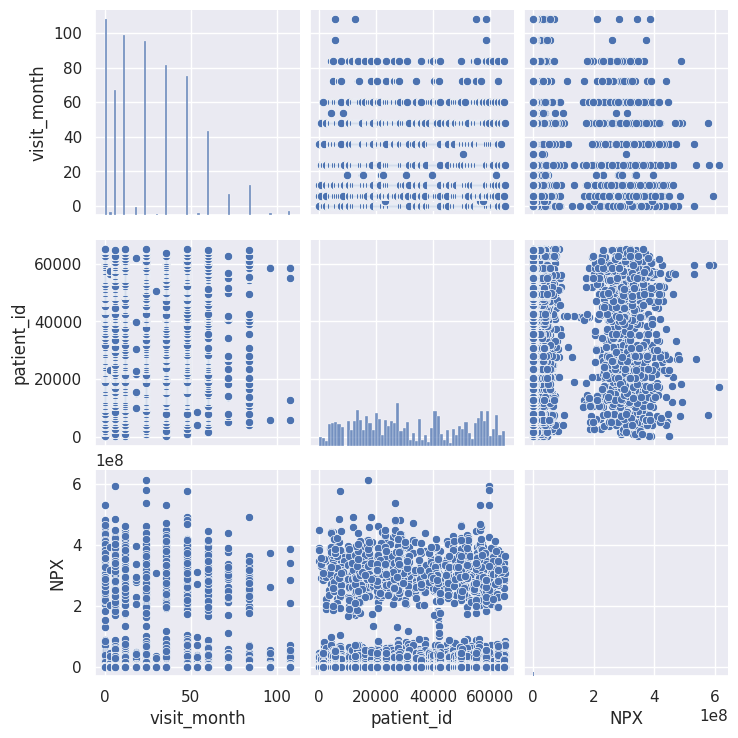

In [46]:
sns.pairplot(proteins_df)
plt.show()

### Sự thay đổi của tần suất xuất hiện của Protein trong mẫu (NPX) như thế nào?

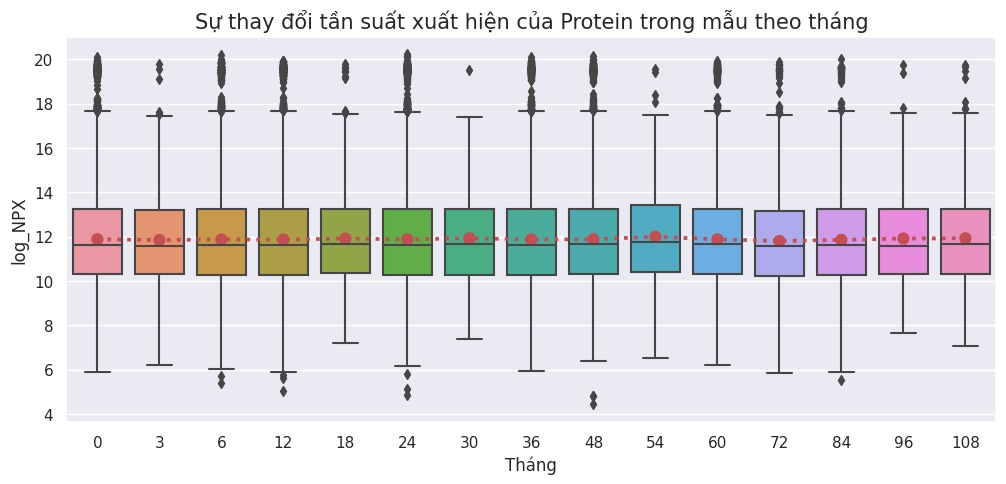

In [47]:
proteins_copy_df = proteins_df.copy()
proteins_copy_df['log_NPX'] = np.log(proteins_copy_df['NPX'])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

sns.boxplot(data= proteins_copy_df, x= 'visit_month', y= 'log_NPX', ax= ax)
sns.pointplot(data= proteins_copy_df, x= 'visit_month', y= 'log_NPX', color= 'r', errorbar= None, linestyles= [':'], ax= ax)
ax.set_title('Sự thay đổi tần suất xuất hiện của Protein trong mẫu theo tháng', fontsize= 15)
ax.set_xlabel('Tháng')
ax.set_ylabel('log_NPX')

plt.show()

**Nhận xét:** Tần suất xuất hiện của Protein trong mẫu đánh giá không đổi theo thời gian.

## **Dữ liệu khám lâm sàng của các bệnh nhân**

### **Phân bố của các cột dữ liệu kiểu số**

In [48]:
numerical_features = ['visit_month', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']

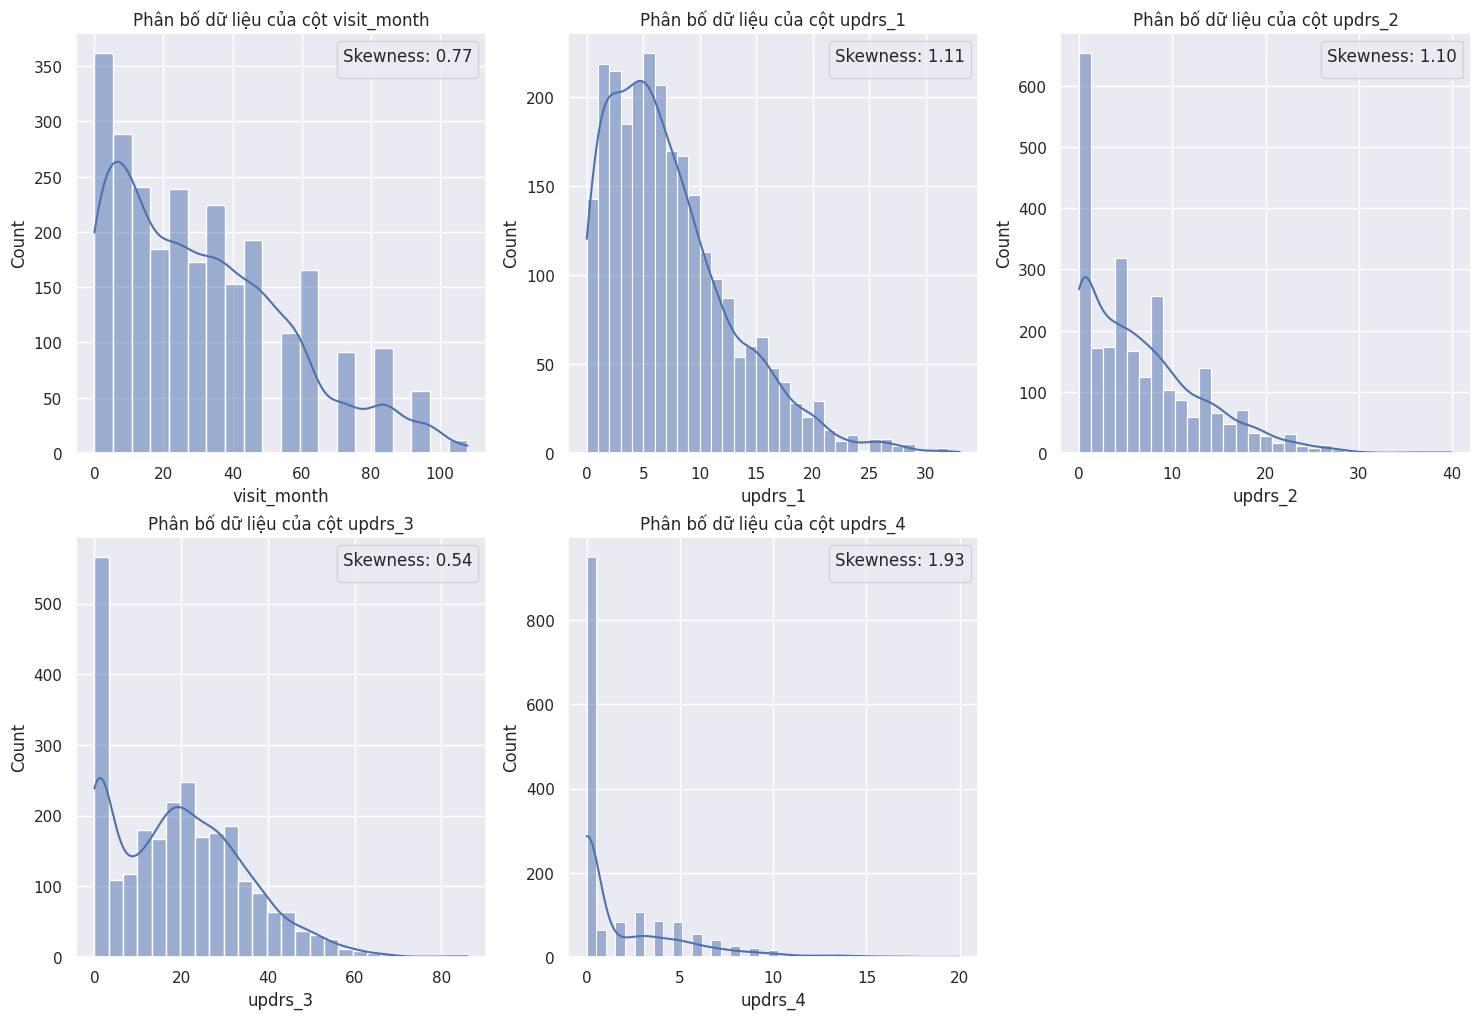

In [49]:
nrows = 2
ncols = 3

fig = plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features):
    fig.add_subplot(nrows, ncols, i + 1)
    skewness = clinical_df[col].skew()
    plt.legend(loc = 'best', labels = ['_'], title = 'Skewness: %.2f'%(skewness))
    sns.histplot(data= clinical_df, x= col, kde= True, legend= True)
    plt.title(f'Phân bố dữ liệu của cột {col}')
plt.show()

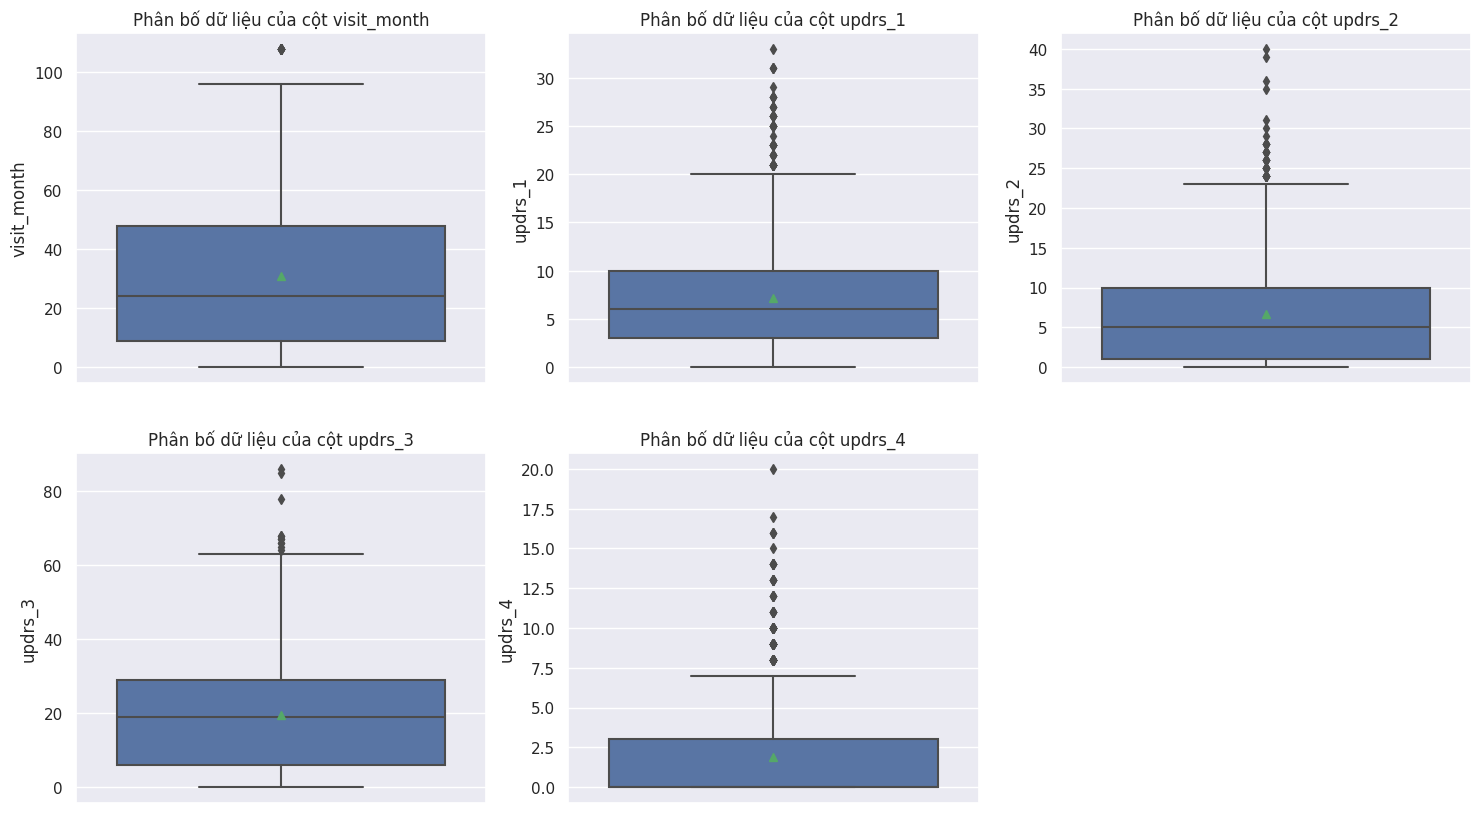

In [50]:
nrows = 2
ncols = 3

fig = plt.figure(figsize=(18, 10))
for i, col in enumerate(numerical_features):
    fig.add_subplot(nrows, ncols, i + 1)
    sns.boxplot(data= clinical_df, y= col, showmeans= True)
    plt.title(f'Phân bố dữ liệu của cột {col}')
plt.show()

### **Phân bố của các cột dữ liệu kiểu object**

In [51]:
categorical_features = ['upd23b_clinical_state_on_medication']

#### **Tỉ lệ phần trăm bệnh nhân có sử dụng thuốc hay không trong lúc đánh giá**

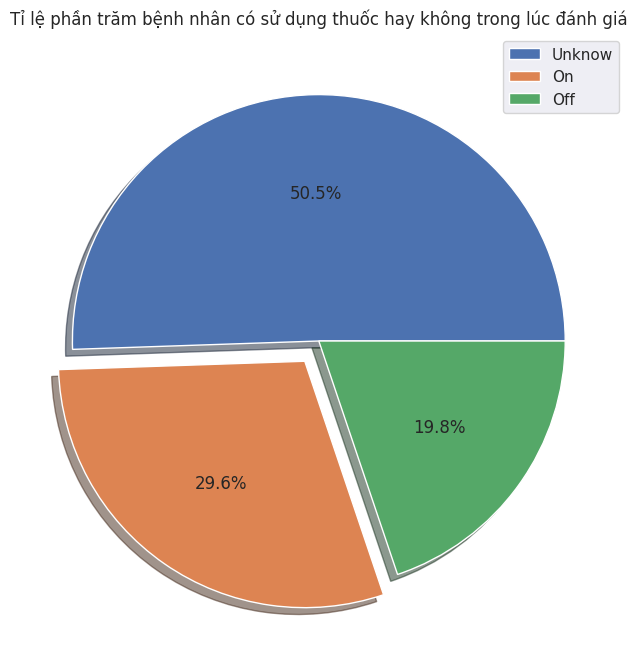

In [52]:
state_count_df = clinical_df['upd23b_clinical_state_on_medication'].value_counts().to_frame(name = 'count').reset_index()
state_count_df = state_count_df.rename(columns = {'index' : 'state'})
state_count_df

explode = (0, 0.1, 0)
plt.pie(state_count_df['count'], explode = explode, autopct='%1.1f%%', shadow=True)
plt.title('Tỉ lệ phần trăm bệnh nhân có sử dụng thuốc hay không trong lúc đánh giá')
plt.legend(loc = 'best', labels = state_count_df['state'])

### **Tương quan giữa các cột dữ liệu**

<ipython-input-53-dda279ff1b26>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data= clinical_df.corr(method= 'pearson'), cmap="YlGnBu", annot= True)


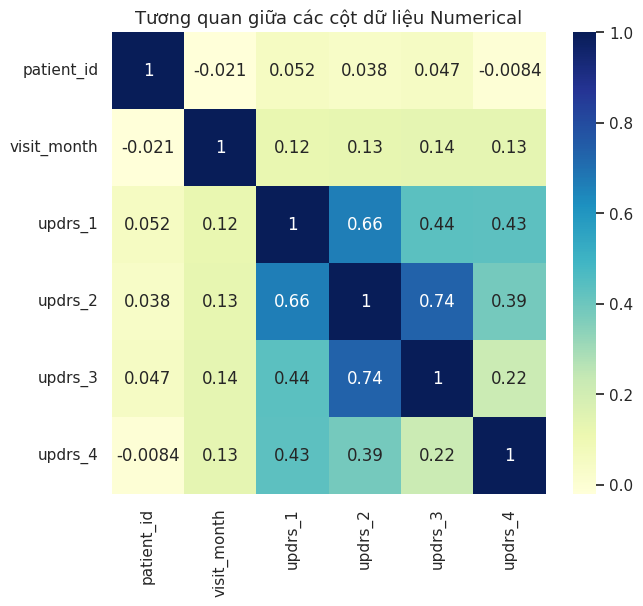

In [53]:
plt.figure(figsize= (7, 6))
plt.title('Tương quan giữa các cột dữ liệu Numerical', fontsize= 13)
sns.heatmap(data= clinical_df.corr(method= 'pearson'), cmap="YlGnBu", annot= True)
plt.show()

### **Mối quan hệ giữa các cột dữ liệu**

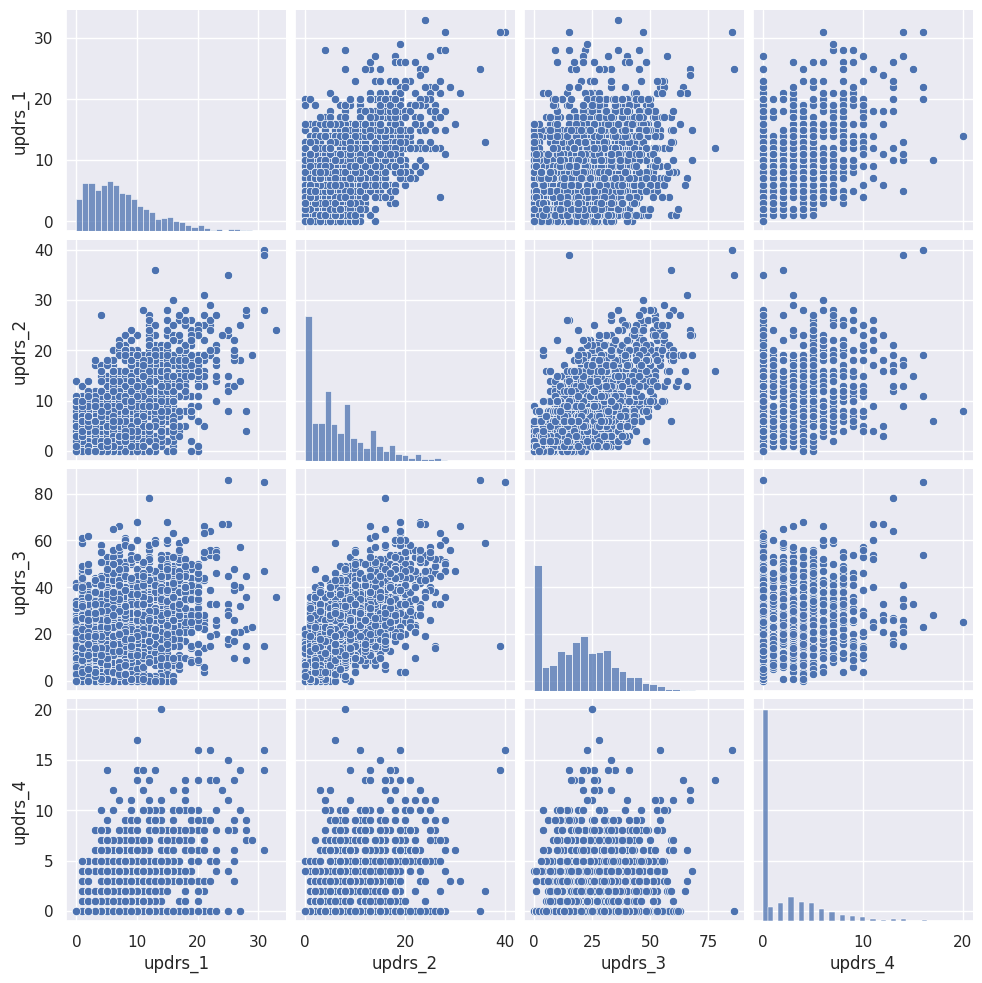

In [54]:
updrs_cols = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
sns.pairplot(clinical_df[updrs_cols])
plt.show()

### **Sự thay đổi của tình trạng bệnh theo thời gian như thế nào?**

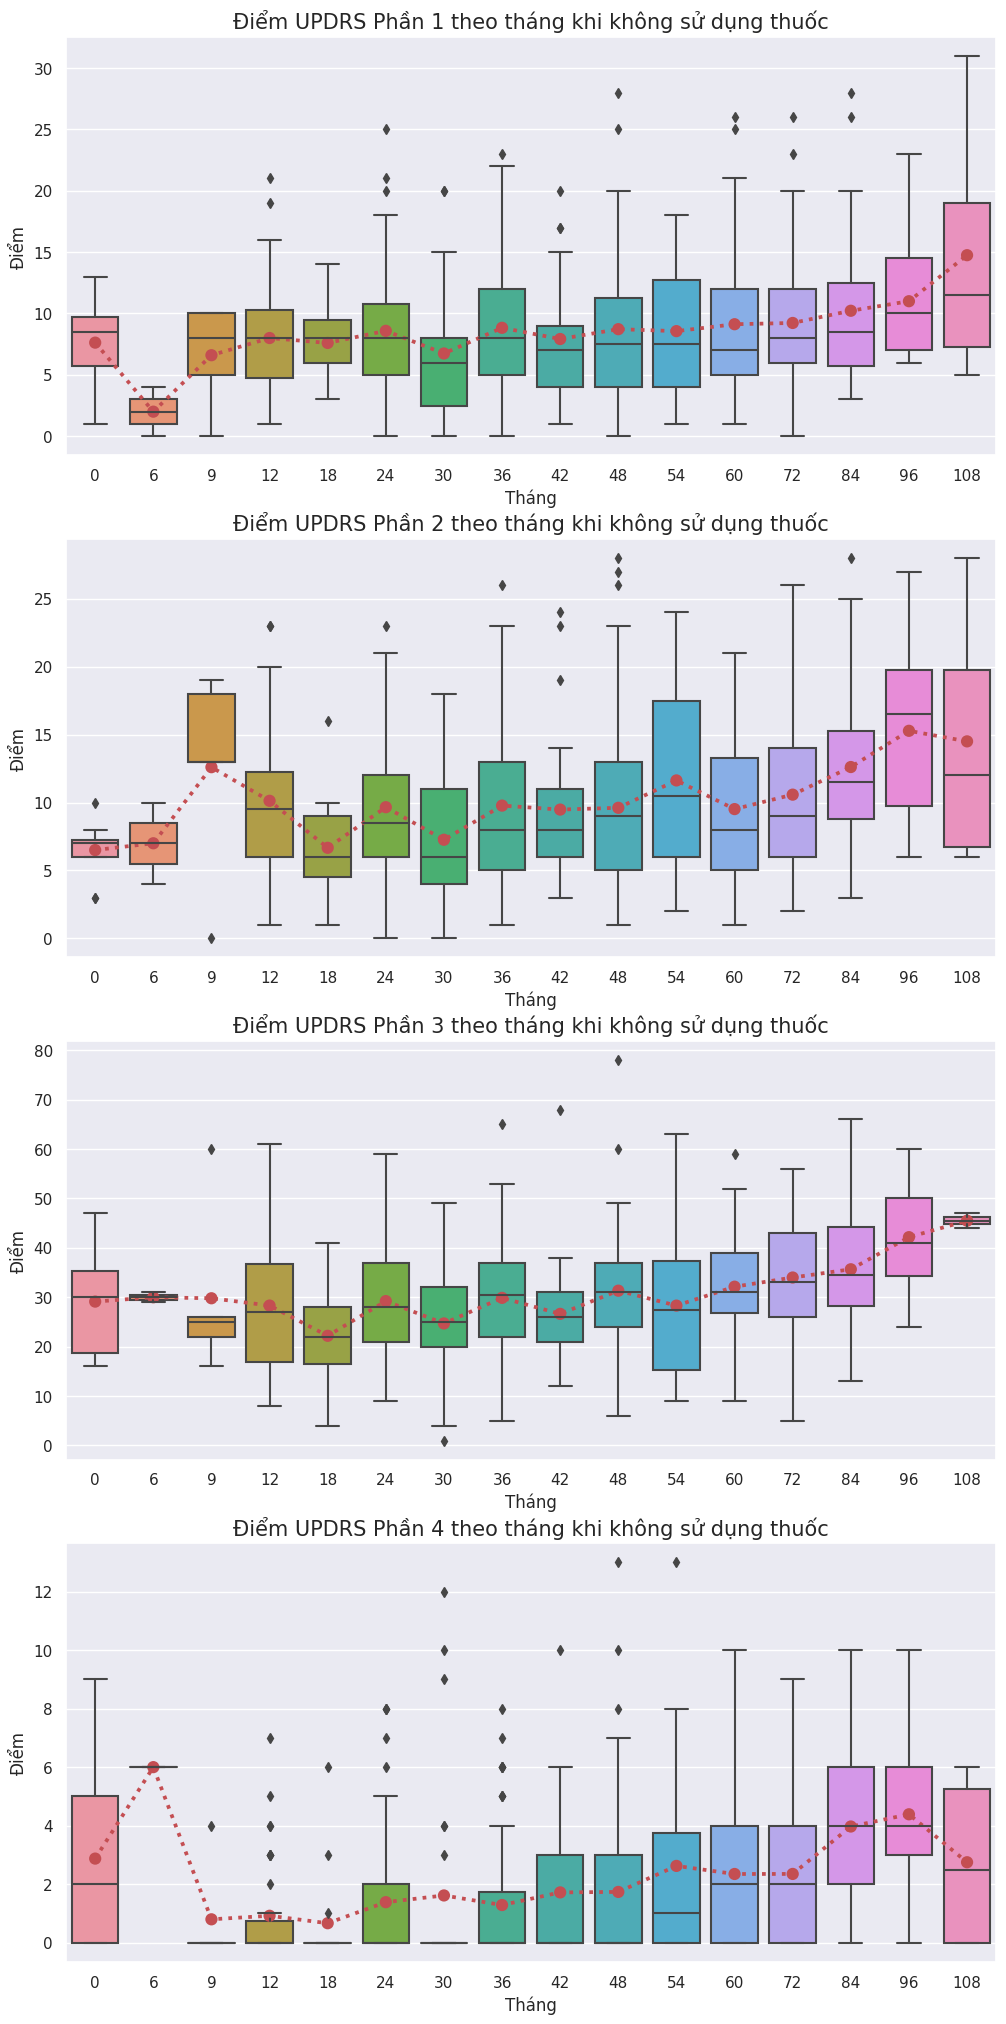

In [55]:
clinical_copy_df = clinical_df.copy()
fig, axs = plt.subplots(nrows= 4, ncols= 1, figsize=(12, 25))
axs = axs.flatten()

for x, feature in enumerate(['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']):
    ax = axs[x]
    data = clinical_copy_df[clinical_copy_df['upd23b_clinical_state_on_medication'] == 'Off']
    sns.boxplot(data= data, x= 'visit_month', y= feature, ax= ax)
    sns.pointplot(data= data, x= 'visit_month', y= feature, color= 'r', errorbar= None, linestyles= [':'], ax= ax)
    ax.set_title(f'Điểm UPDRS Phần {x + 1} theo tháng khi không sử dụng thuốc', fontsize= 15)
    ax.set_xlabel('Tháng')
    ax.set_ylabel('Điểm')
plt.show()

**Nhận xét:** Khi không sử dụng thuốc trong quá trình đánh giá thì
- Điểm UDPRS phần 1, 2, 3 có xu hướng tăng nhẹ theo thời gian.
- Điểm UDPRS phần 4 tăng sau 6 tháng sau đó giảm, sau 9 tháng có xu hướng tăng nhẹ theo thời gian.

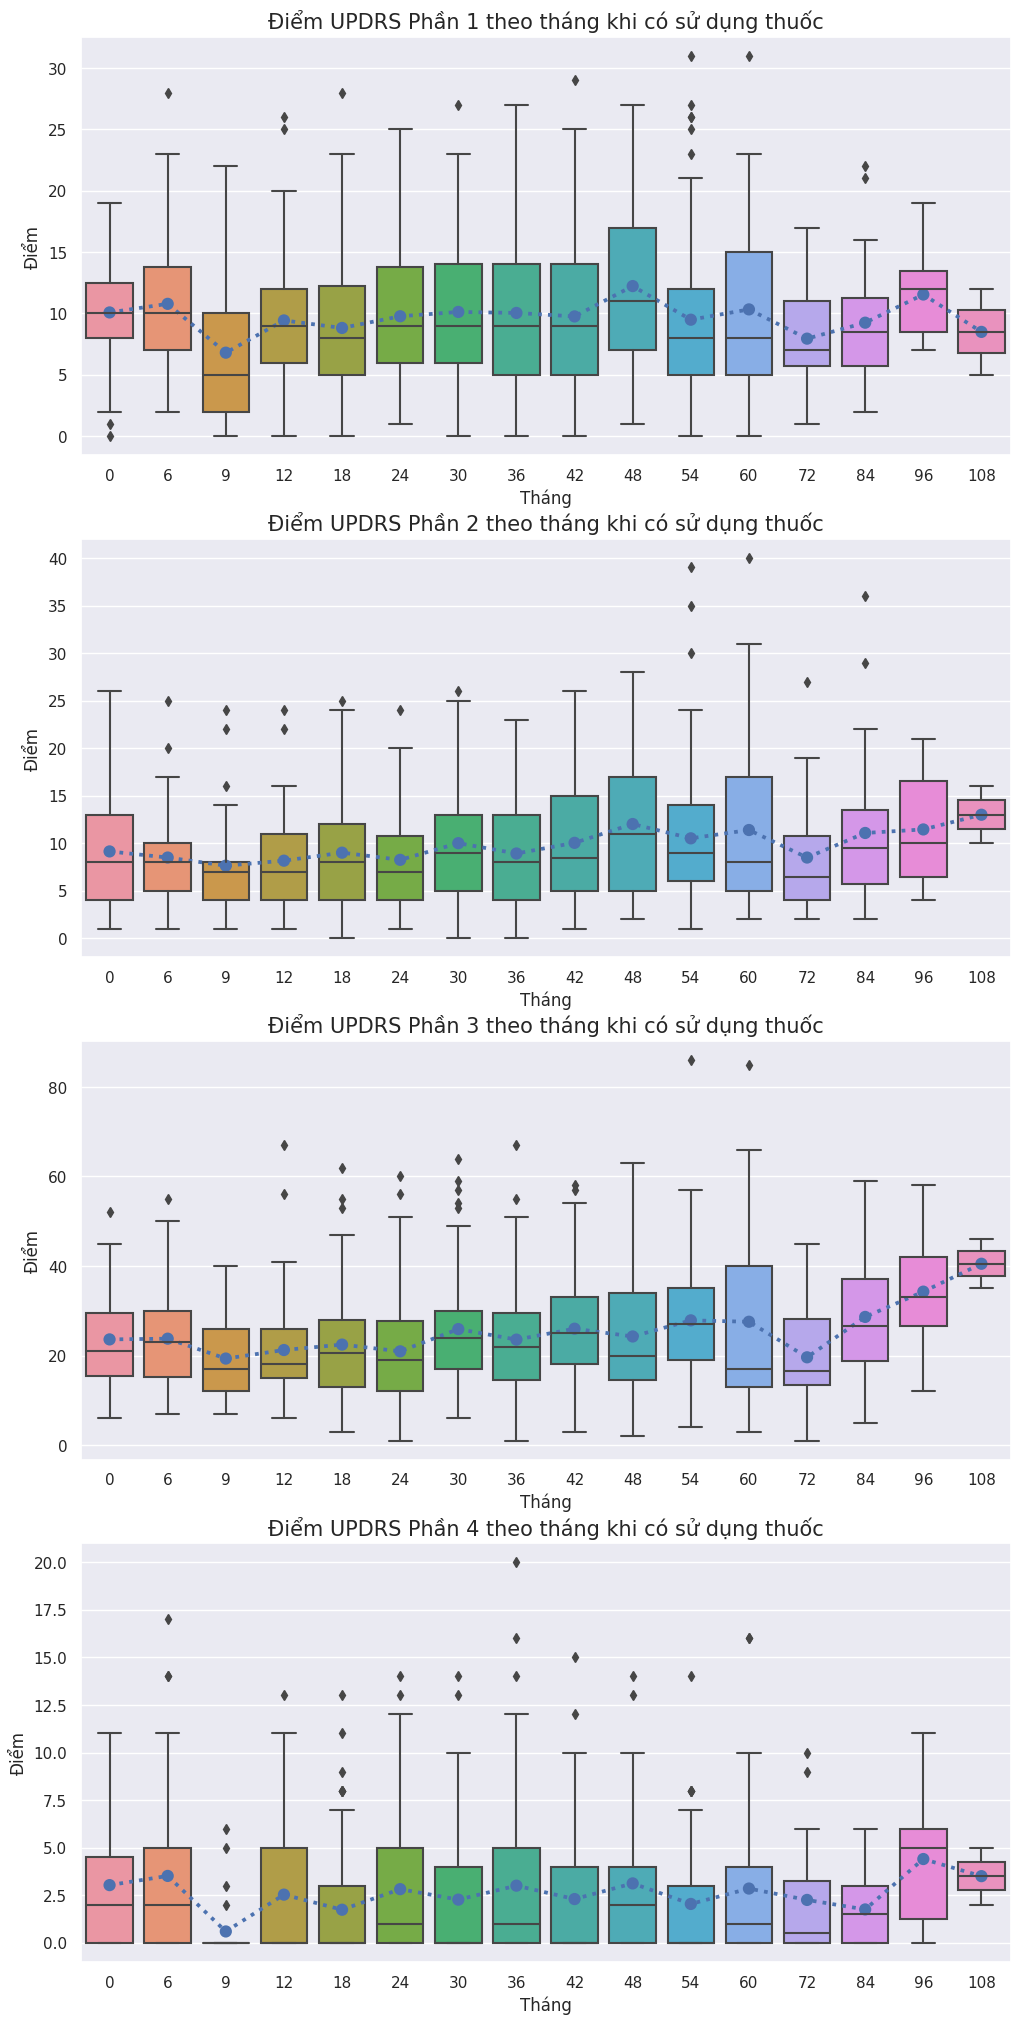

In [56]:
clinical_copy_df = clinical_df.copy()
fig, axs = plt.subplots(nrows= 4, ncols= 1, figsize=(12, 25))
axs = axs.flatten()

for x, feature in enumerate(['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']):
    ax = axs[x]
    data = clinical_copy_df[clinical_copy_df['upd23b_clinical_state_on_medication'] == 'On']
    sns.boxplot(data= data, x= 'visit_month', y= feature, ax= ax)
    sns.pointplot(data= data, x= 'visit_month', y= feature, color= 'b', errorbar= None, linestyles= [':'], ax= ax)
    ax.set_title(f'Điểm UPDRS Phần {x + 1} theo tháng khi có sử dụng thuốc', fontsize= 15)
    ax.set_xlabel('Tháng')
    ax.set_ylabel('Điểm')
plt.show()

**Nhận xét:** Khi có thuốc trong quá trình đánh giá thì
- Điểm UDPRS phần 1, 2, 4 gần như không đổi theo thời gian.
- Điểm UDPRS phần 3 có xu hướng tăng nhẹ theo thời gian.

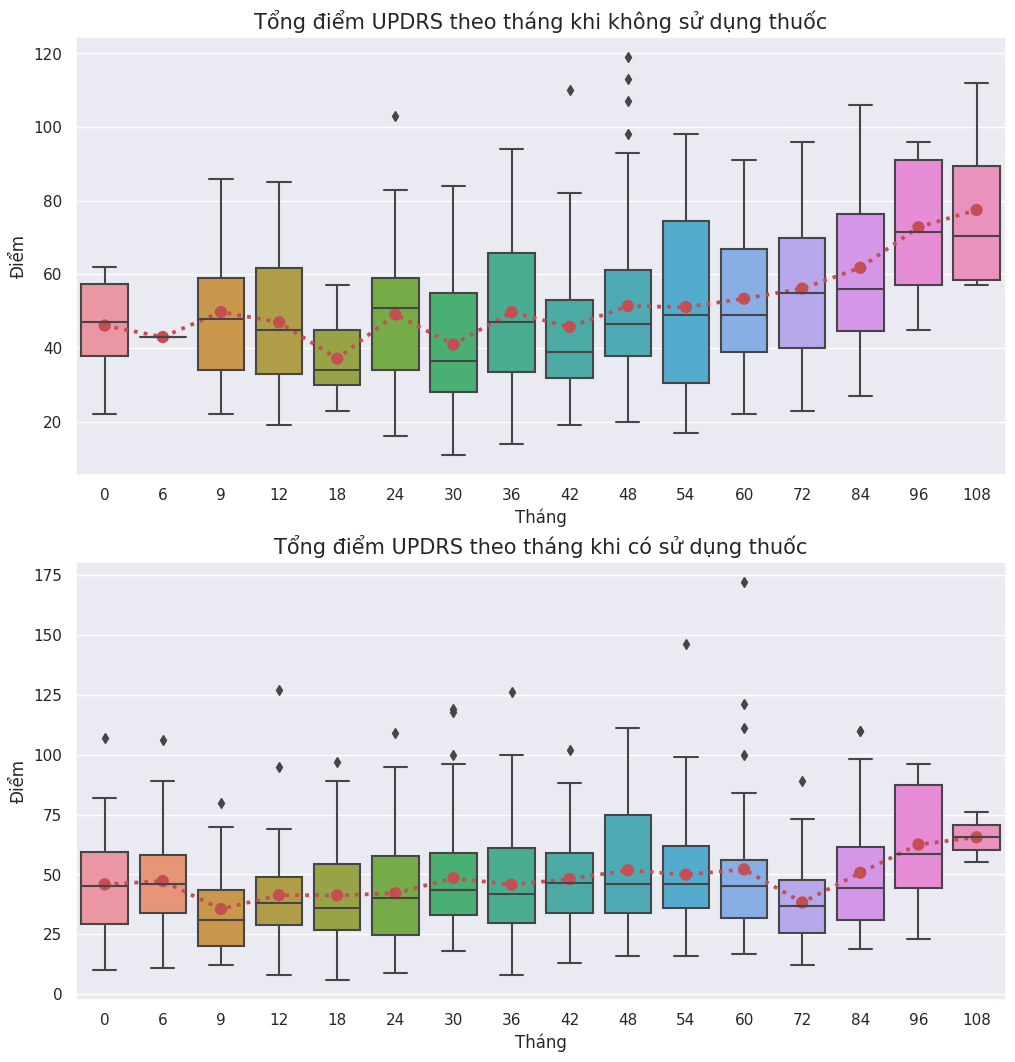

In [57]:
clinical_copy_df = clinical_df.copy()
clinical_copy_df['updrs_sum'] = clinical_copy_df["updrs_1"] + clinical_copy_df["updrs_2"] + clinical_copy_df["updrs_3"] + clinical_copy_df["updrs_4"]

fig, axs = plt.subplots(nrows= 2, ncols= 1, figsize= (12, 12.5))
axs = axs.flatten()

data = clinical_copy_df[clinical_copy_df['upd23b_clinical_state_on_medication'] == 'Off']
ax = axs[0]
sns.boxplot(data= data, x= 'visit_month', y= 'updrs_sum', ax= ax)
sns.pointplot(data= data, x= 'visit_month', y= 'updrs_sum', color= 'r', errorbar= None, linestyles= [":"], ax= ax)
ax.set_title('Tổng điểm UPDRS theo tháng khi không sử dụng thuốc', fontsize= 15)
ax.set_xlabel('Tháng')
ax.set_ylabel('Điểm')

data = clinical_copy_df[clinical_copy_df["upd23b_clinical_state_on_medication"] == "On"]
ax = axs[1]
sns.boxplot(data= data, x= 'visit_month', y= 'updrs_sum', ax= ax)
sns.pointplot(data= data, x= 'visit_month', y= 'updrs_sum', color= 'r', errorbar= None, linestyles= [":"], ax= ax)
ax.set_title('Tổng điểm UPDRS theo tháng khi có sử dụng thuốc', fontsize= 15)
ax.set_xlabel('Tháng')
ax.set_ylabel('Điểm')

plt.show()

**Nhận xét:**
- Tổng điểm UPDRS khi không sử dụng thuốc trong quá trình đánh giá tăng theo thời gian.
- Tổng điểm UPDRS khi có sử dụng thuốc trong quá trình đánh giá gần như không đổi theo thời gian.

### **Mối quan hệ giữa tần suất xuất hiện protein(NPX) và các cột điểm đánh giá**

In [58]:
protein_count_per_patient = proteins_df.groupby('patient_id')['UniProt'].count().mean().round()
print('Trung bình mỗi bệnh nhân có khoảng {} loại protein khác nhau'.format(protein_count_per_patient))

Trung bình mỗi bệnh nhân có khoảng 938.0 loại protein khác nhau


**Tần suất xuất hiện trung bình của các protein ở mỗi bệnh nhân**

In [59]:
mean_npx_per_patient = proteins_df.groupby('patient_id', as_index = False)['NPX'].mean()
mean_npx_per_patient

,patient_id,NPX
0,55,3.172303e+06
1,942,2.618713e+06
2,1517,2.525247e+06
3,1923,3.317901e+06
4,2660,2.555753e+06
...,...,...
243,63875,2.557699e+06
244,63889,3.108653e+06
245,64669,2.705470e+06
246,64674,2.334248e+06


In [60]:
mean_updrs_per_patient = clinical_df.groupby('patient_id', as_index = False)[['updrs_1','updrs_2','updrs_3','updrs_4']].mean().round(2)
mean_updrs_per_patient

,patient_id,updrs_1,updrs_2,updrs_3,updrs_4
0,55,12.62,13.08,40.92,0.00
1,942,3.93,4.07,25.60,0.27
2,1517,18.40,12.70,32.60,6.30
3,1923,2.14,0.14,1.14,NaN
4,2660,3.83,0.00,0.83,NaN
...,...,...,...,...,...
243,63875,3.44,1.00,1.00,0.00
244,63889,6.80,5.50,18.70,1.56
245,64669,16.27,15.80,34.53,0.00
246,64674,9.25,11.75,36.56,3.00


Kết hợp 2 bảng với nhau dựa vào patient_id

In [61]:
merged_df = mean_npx_per_patient.merge(mean_updrs_per_patient, on = 'patient_id')

**Trực quan dữ liệu**

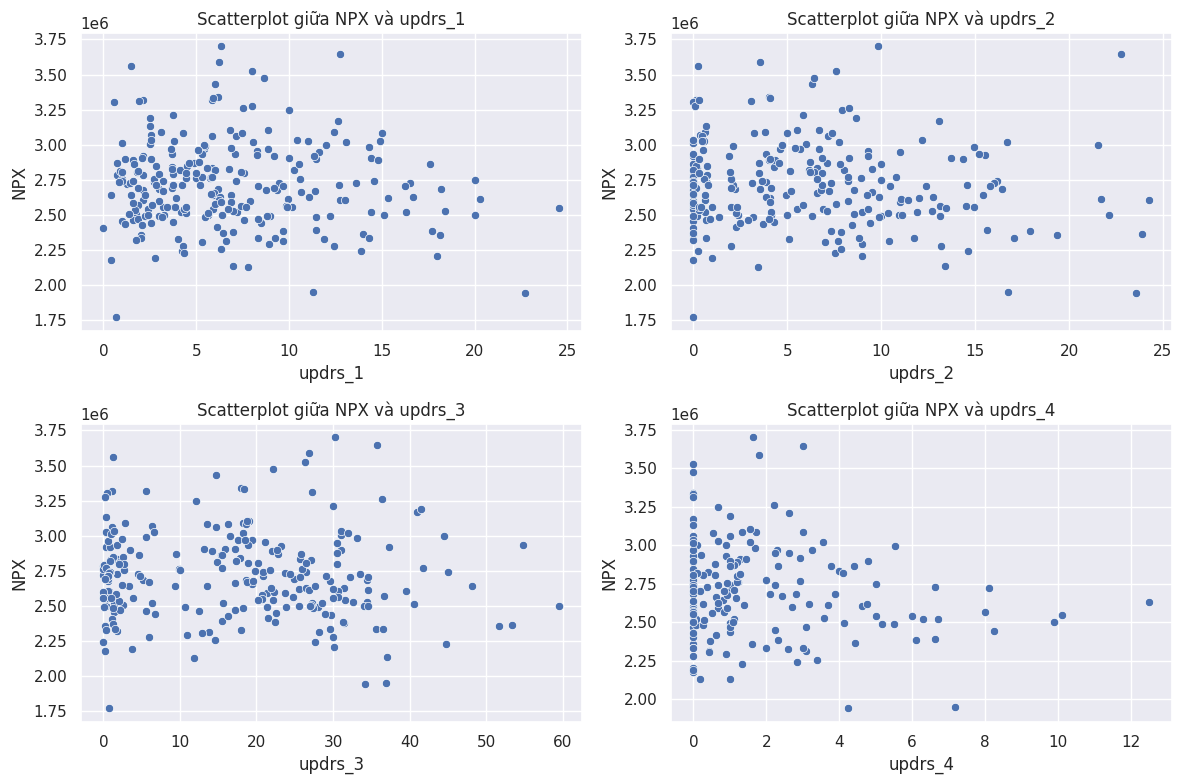

In [62]:
rating_cols = ['updrs_1','updrs_2','updrs_3','updrs_4']
fig,axes = plt.subplots(2,2)
for i,ax in enumerate(axes.flat):
  sns.scatterplot(merged_df, x = rating_cols[i], y = 'NPX', ax = ax)
  ax.set_title('Scatterplot giữa NPX và {}'.format(rating_cols[i]))
plt.tight_layout()

**Nhận xét:** Giữa số điểm đánh giá và tần suất xuất hiện của protein không thực sự có mối liên hệ, sự tương quan nào rõ ràng.

# **Rút trích đặc trưng và chuẩn bị dữ liệu huấn luyện**

## **Xử lý dữ liệu bị thiếu**
Dữ liệu bị thiếu hiện tại là cột `updrs_4` của tập dữ liệu khám lâm sàng `clinical_df`. Những giá trị bị thiếu sẽ được điền bằng giá trị 0.

In [63]:
clinical_df1 = clinical_df.copy()
clinical_df1.isna().sum()

visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   0
updrs_2                                   0
updrs_3                                   0
updrs_4                                1026
upd23b_clinical_state_on_medication       0
dtype: int64

In [64]:
clinical_df1['updrs_4'] = clinical_df1['updrs_4'].fillna(0)
clinical_df1.isna().sum()

visit_id                               0
patient_id                             0
visit_month                            0
updrs_1                                0
updrs_2                                0
updrs_3                                0
updrs_4                                0
upd23b_clinical_state_on_medication    0
dtype: int64

## **Chuẩn bị dữ liệu huấn luyện**

In [65]:
proteins_by_uniprot_df = proteins_df.groupby(['visit_id','UniProt'])['NPX'].mean().reset_index()
peptides_by_peptide_df = peptides_df.groupby(['visit_id','Peptide'])['PeptideAbundance'].mean().reset_index()

proteins_by_uniprot_pivot_df = proteins_by_uniprot_df.pivot(index= 'visit_id',columns= 'UniProt', values= 'NPX').rename_axis(columns=None).reset_index()
peptides_by_peptide_pivot_df = peptides_by_peptide_df.pivot(index= 'visit_id', columns= 'Peptide', values= 'PeptideAbundance').rename_axis(columns=None).reset_index()

proteins_peptides_df = proteins_by_uniprot_pivot_df.merge(peptides_by_peptide_pivot_df, on= ['visit_id'], how= 'left')
proteins_peptides_df = proteins_peptides_df.fillna(0)
proteins_peptides_df

,visit_id,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
0,10053_0,9104.27,402321.0,0.00,0.0,7150.57,2497.84,83002.9,15113.6,167327.0,...,202274.0,0.00,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,0.0,7207.30
1,10053_12,10464.20,435586.0,0.00,0.0,0.00,0.00,197117.0,15099.1,164268.0,...,201009.0,0.00,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
2,10053_18,13235.70,507386.0,7126.96,24525.7,0.00,2372.71,126506.0,16289.6,168107.0,...,220728.0,0.00,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
3,10138_12,12600.20,494581.0,9165.06,27193.5,22506.10,6015.90,156313.0,54546.4,204013.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
4,10138_24,12003.20,522138.0,4498.51,17189.8,29112.40,2665.15,151169.0,52338.1,240892.0,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,0.0,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,8699_24,9983.00,400290.0,24240.10,0.0,16943.50,6303.17,77493.6,46435.3,254247.0,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
1109,942_12,6757.32,360858.0,18367.60,14760.7,18603.40,1722.77,86847.4,37741.3,212132.0,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,0.00
1110,942_24,0.00,352722.0,22834.90,23393.1,16693.50,1487.91,114772.0,36095.7,185836.0,...,185428.0,5554.53,0.0,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60
1111,942_48,11627.80,251820.0,22046.50,26360.5,22440.20,2117.43,82241.9,30146.6,167633.0,...,137611.0,6310.09,0.0,28008.8,231359.0,63265.8,64601.8,632782.0,51123.7,20700.30


## **Standardization**

In [66]:
standardlization_features = list(proteins_peptides_df.drop(columns=['visit_id']).columns)
proteins_peptides_standardlization_df = proteins_peptides_df.copy()
proteins_peptides_standardlization_df[standardlization_features] = stats.zscore(proteins_peptides_df[standardlization_features], axis=1)
proteins_peptides_standardlization_df

,visit_id,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
0,10053_0,-0.093245,-0.046222,-0.094333,-0.094333,-0.093478,-0.094035,-0.084408,-0.092526,-0.074324,...,-0.070145,-0.094333,0.432055,-0.085068,-0.024607,-0.085161,-0.081866,-0.030927,-0.094333,-0.093471
1,10053_12,-0.091671,-0.041093,-0.092916,-0.092916,-0.092916,-0.092916,-0.069464,-0.091120,-0.073373,...,-0.069001,-0.092916,0.502159,-0.088544,-0.050604,-0.081961,-0.078252,-0.038916,-0.087053,-0.089902
2,10053_18,-0.099804,-0.042492,-0.100512,-0.098494,-0.101339,-0.101063,-0.086667,-0.099449,-0.081842,...,-0.075739,-0.101339,0.527779,-0.096814,-0.043810,-0.094008,-0.086454,-0.049437,-0.095263,-0.098876
3,10138_12,-0.096732,-0.053478,-0.097040,-0.095423,-0.095843,-0.097323,-0.083835,-0.092968,-0.079554,...,-0.080959,-0.097016,0.252161,-0.093536,-0.068384,-0.089802,-0.086200,-0.048304,-0.091971,-0.096977
4,10138_24,-0.089662,-0.048560,-0.090267,-0.089244,-0.088284,-0.090415,-0.078449,-0.086412,-0.071220,...,-0.074017,-0.090116,0.193127,-0.084991,-0.050606,-0.084110,-0.081621,-0.090629,-0.086039,-0.090234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,8699_24,-0.101052,-0.065121,-0.099739,-0.101971,-0.100411,-0.101391,-0.094837,-0.097696,-0.078565,...,-0.075284,-0.101178,0.705419,-0.098878,-0.016716,-0.091025,-0.089664,-0.049325,-0.094582,-0.096918
1109,942_12,-0.091112,-0.056062,-0.089963,-0.090320,-0.089940,-0.091611,-0.083185,-0.088045,-0.070783,...,-0.074631,-0.091309,-0.054731,-0.088241,-0.066996,-0.085251,-0.084063,-0.043651,-0.087324,-0.091781
1110,942_24,-0.092475,-0.058145,-0.090252,-0.090198,-0.090850,-0.092330,-0.081304,-0.088962,-0.074388,...,-0.074427,-0.091934,-0.092475,-0.086241,-0.045808,-0.085807,-0.085225,-0.037835,-0.087325,-0.090348
1111,942_48,-0.090986,-0.068893,-0.090028,-0.089631,-0.089992,-0.091861,-0.084491,-0.089283,-0.076637,...,-0.079398,-0.091475,-0.092056,-0.089479,-0.070775,-0.086236,-0.086114,-0.033852,-0.087353,-0.090152


## **Rút trích đặc trưng**
Sử dụng tất cả các đặc trưng có trong tập dữ liệu bên trên (ngoại trừ `visit_id`, `patient_id`), các đặc trưng đích cần dự đoán (`updrs_1`, `updrs_2`, `updrs_3`, `updrs_4`), và `visit_month`.

Các đặc trưng đích sẽ được thêm vào mỗi lần huấn luyện.

In [67]:
features = list(proteins_peptides_standardlization_df.drop(columns= ['visit_id']).columns)
features.append('visit_month')

# **Xây dựng mô hình huấn luyện**
Nhóm sẽ sử dụng Random Forest dự đoán điểm MDS_UPDRS

In [68]:
targets = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']

In [69]:
def smape(A, F):
    return 100 / len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [70]:
random_forest_model = {}
random_forest_smape = {}

for updrs in targets:
    # Lấy dữ liệu chuẩn bị huấn luyện mô hình
    df = proteins_peptides_standardlization_df.merge(clinical_df[['visit_id', 'patient_id', 'visit_month', updrs]], on= 'visit_id', how= 'left')
    df = df.dropna(subset= [updrs])
    feature_list = features.copy()
    feature_list.append(updrs)

    # Chia tập train và tập test
    test_indices = np.random.rand(len(df)) < 0.25
    df1 = df[feature_list].copy()
    train_df = df1[~test_indices]
    test_df = df1[test_indices]

    print(f'{updrs.upper()}:')
    print(f'Training examples: {len(train_df)}')
    print(f'Testing examples: {len(test_df)}')

    # Chuyển tập dữ liệu từ DataFrame của Pandas qua tập dữ liệu của TF
    train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label= updrs, task = tfdf.keras.Task.REGRESSION)
    test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label= updrs, task = tfdf.keras.Task.REGRESSION)

    # Khởi tạo mô hình
    rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION, verbose= 0)
    rf.compile(metrics= ['mse'])

    # Huấn luyện mô hình
    rf.fit(train_dataset)
    random_forest_model[updrs] = rf

    # Dự đoán và đánh giá
    pred = rf.predict(test_dataset)
    random_forest_smape[updrs] = smape(test_df[updrs].values.tolist(), pred.flatten())

UPDRS_1:
Training examples: 790
Testing examples: 268


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 2s 2s/step
UPDRS_2:
Training examples: 808
Testing examples: 250
1/1 [==============================] - 2s 2s/step
UPDRS_3:
Training examples: 784
Testing examples: 274


1/1 [==============================] - 3s 3s/step
UPDRS_4:
Training examples: 401
Testing examples: 163
1/1 [==============================] - 2s 2s/step


In [71]:
for name, value in random_forest_smape.items():
  print(f'label {name}: SMAPE {value:.4f}')

print(f'\nAverage SMAPE {sum(random_forest_smape.values()) / 4}')

label updrs_1: SMAPE 67.1266
label updrs_2: SMAPE 95.7195
label updrs_3: SMAPE 88.4462
label updrs_4: SMAPE 148.0169

Average SMAPE 99.8273034864309


# **Đánh giá**

## **UPDRS_1**

In [72]:
updrs_1_model = random_forest_model['updrs_1']
updrs_1_model

### **Trực quan hóa mô hình**

In [73]:
tfdf.model_plotter.plot_model_in_colab(updrs_1_model, tree_idx=0, max_depth= 5)

### **Đánh giá mô hình dựa với dữ liệu nằm ngoài túi (Out of bag - OOB)**

Tiến hành đánh giá mô hình với những dữ liệu không được chọn vào việc huấn luyện (nằm ngoài túi) với độ đọ RMSE để đánh giá mô hình.

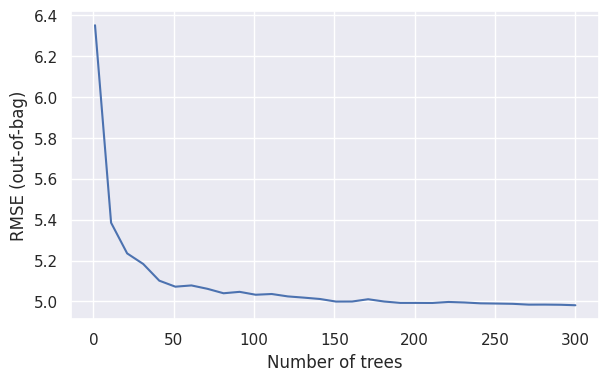

In [74]:
logs = updrs_1_model.make_inspector().training_logs()

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel('Number of trees')
plt.ylabel('RMSE (out-of-bag)')

plt.show()

### **Ảnh hưởng của các Protein và Peptide đối với điểm UPDRS_1**

In [75]:
var_importances = updrs_1_model.make_inspector().variable_importances()["NUM_AS_ROOT"]
peptides = {}
proteins = {}

for s, impotace_val in var_importances:
    var = str(s[0]).split()[0].replace('"', '')
    if re.compile(r'.*UniMod_.*').match(var): peptides[var] = impotace_val
    elif re.compile(r'.[0-9]').match(var): proteins[var] = impotace_val
    else: peptides[var] = impotace_val

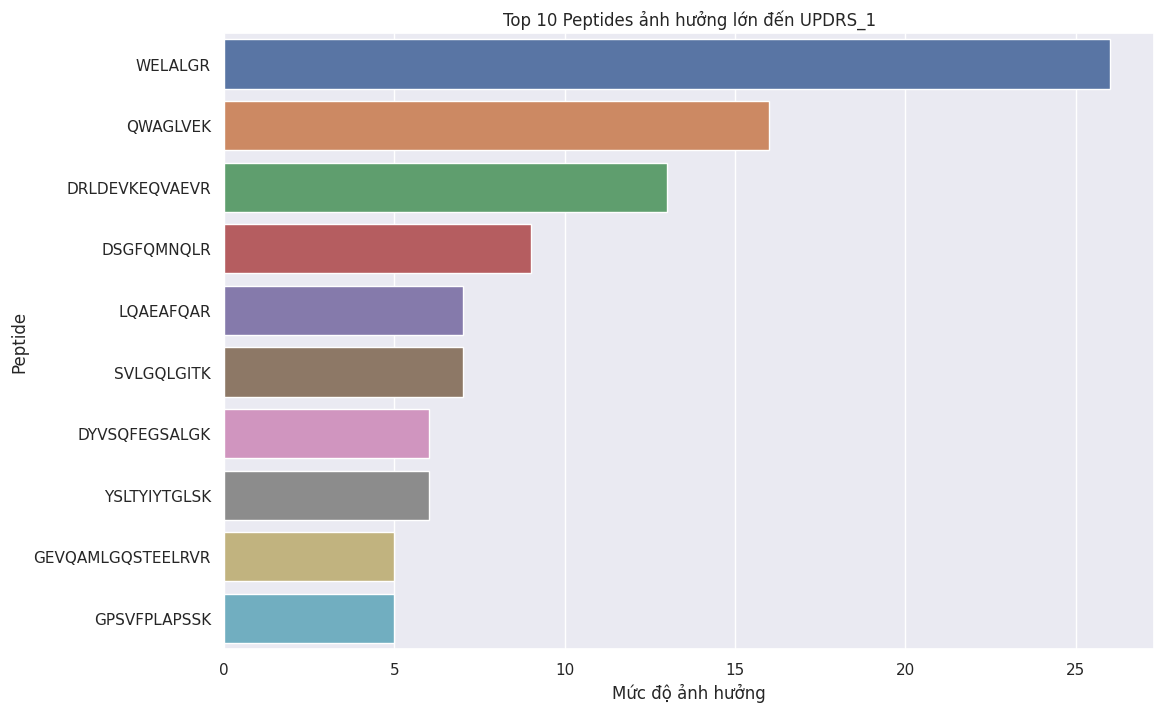

In [76]:
data = dict(sorted(peptides.items(), key=lambda item: item[1], reverse= True))
sns.barplot(x= list(data.values())[:10], y= list(data.keys())[:10])
plt.xlabel('Mức độ ảnh hưởng')
plt.ylabel('Peptide')
plt.title('Top 10 Peptides ảnh hưởng lớn đến UPDRS_1')

plt.show()

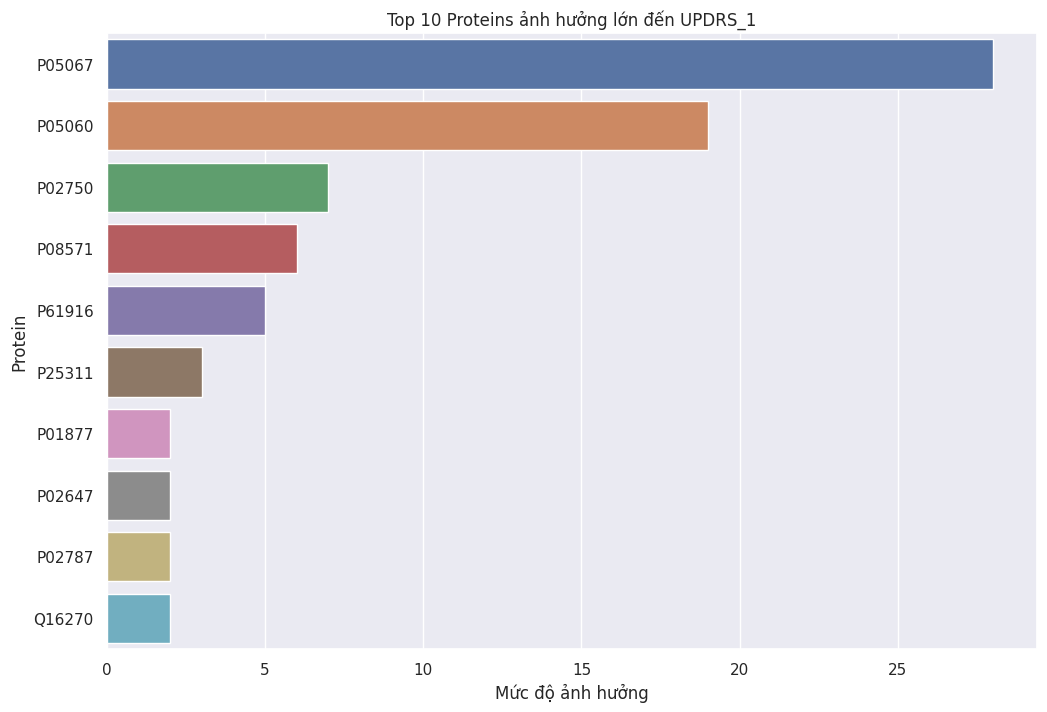

In [77]:
data = dict(sorted(proteins.items(), key=lambda item: item[1], reverse= True))
sns.barplot(x= list(data.values())[:10], y= list(data.keys())[:10])
plt.xlabel('Mức độ ảnh hưởng')
plt.ylabel('Protein')
plt.title('Top 10 Proteins ảnh hưởng lớn đến UPDRS_1')

plt.show()

## **UPDRS_2**

In [78]:
updrs_2_model = random_forest_model['updrs_2']
updrs_2_model

### **Trực quan hóa mô hình**

In [79]:
tfdf.model_plotter.plot_model_in_colab(updrs_2_model, tree_idx=0, max_depth= 5)

### **Đánh giá mô hình dựa với dữ liệu nằm ngoài túi (Out of bag - OOB)**

Tiến hành đánh giá mô hình với những dữ liệu không được chọn vào việc huấn luyện (nằm ngoài túi) với độ đọ RMSE để đánh giá mô hình.

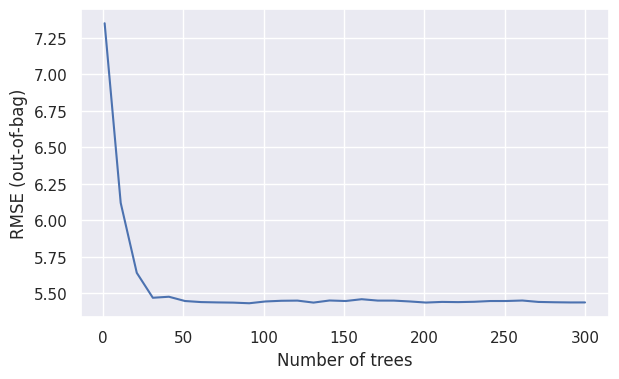

In [80]:
logs = updrs_2_model.make_inspector().training_logs()

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel('Number of trees')
plt.ylabel('RMSE (out-of-bag)')
plt.show()

### **Ảnh hưởng của các Protein và Peptide đối với điểm UPDRS_2**

In [81]:
var_importances = updrs_2_model.make_inspector().variable_importances()["NUM_AS_ROOT"]
peptides = {}
proteins = {}

for s, impotace_val in var_importances:
    var = str(s[0]).split()[0].replace('"', '')
    if re.compile(r'.*UniMod_.*').match(var): peptides[var] = impotace_val
    elif re.compile(r'.[0-9]').match(var): proteins[var] = impotace_val
    else: peptides[var] = impotace_val

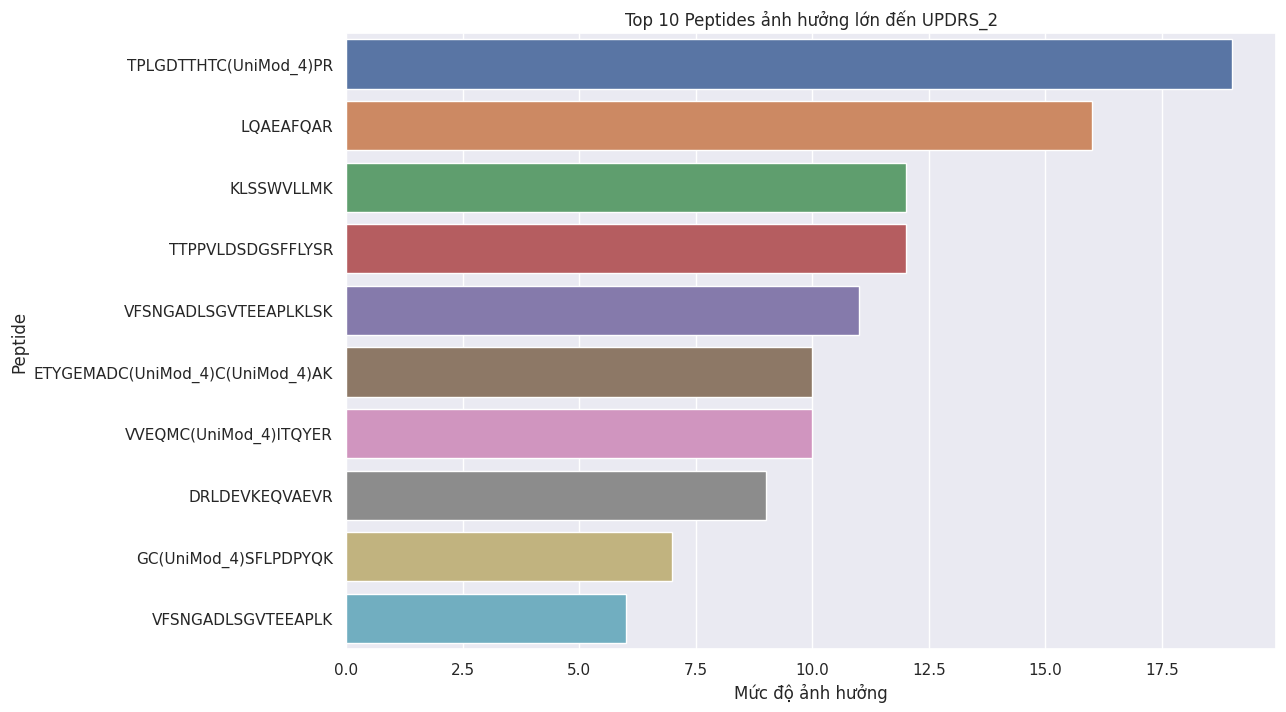

In [82]:
data = dict(sorted(peptides.items(), key=lambda item: item[1], reverse= True))
sns.barplot(x= list(data.values())[:10], y= list(data.keys())[:10])
plt.xlabel('Mức độ ảnh hưởng')
plt.ylabel('Peptide')
plt.title('Top 10 Peptides ảnh hưởng lớn đến UPDRS_2')

plt.show()

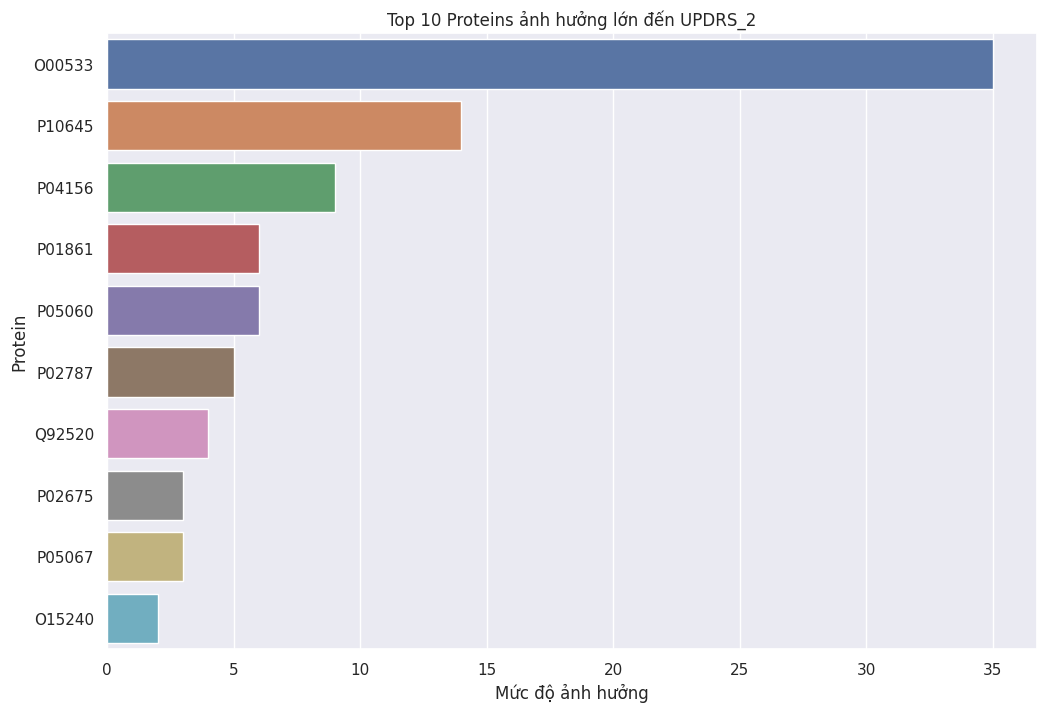

In [83]:
data = dict(sorted(proteins.items(), key=lambda item: item[1], reverse= True))
sns.barplot(x= list(data.values())[:10], y= list(data.keys())[:10])
plt.xlabel('Mức độ ảnh hưởng')
plt.ylabel('Protein')
plt.title('Top 10 Proteins ảnh hưởng lớn đến UPDRS_2')

plt.show()

## **UPDRS_3**

In [84]:
updrs_3_model = random_forest_model['updrs_3']
updrs_3_model

### **Trực quan hóa mô hình**

In [85]:
tfdf.model_plotter.plot_model_in_colab(updrs_3_model, tree_idx=0, max_depth= 5)

### **Đánh giá mô hình dựa với dữ liệu nằm ngoài túi (Out of bag - OOB)**

Tiến hành đánh giá mô hình với những dữ liệu không được chọn vào việc huấn luyện (nằm ngoài túi) với độ đọ RMSE để đánh giá mô hình.

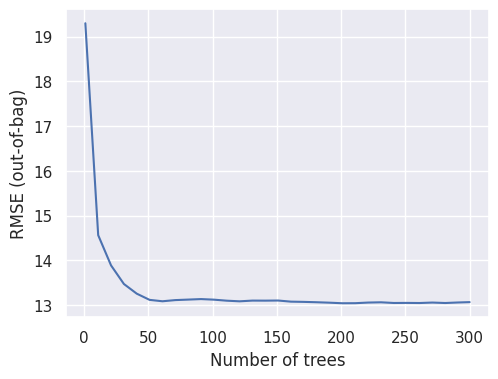

In [86]:
logs = updrs_3_model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel('Number of trees')
plt.ylabel('RMSE (out-of-bag)')

plt.show()

### **Ảnh hưởng của các Protein và Peptide đối với điểm UPDRS_3**

In [87]:
var_importances = updrs_3_model.make_inspector().variable_importances()["NUM_AS_ROOT"]
peptides = {}
proteins = {}

for s, impotace_val in var_importances:
    var = str(s[0]).split()[0].replace('"', '')
    if re.compile(r'.*UniMod_.*').match(var): peptides[var] = impotace_val
    elif re.compile(r'.[0-9]').match(var): proteins[var] = impotace_val
    else: peptides[var] = impotace_val

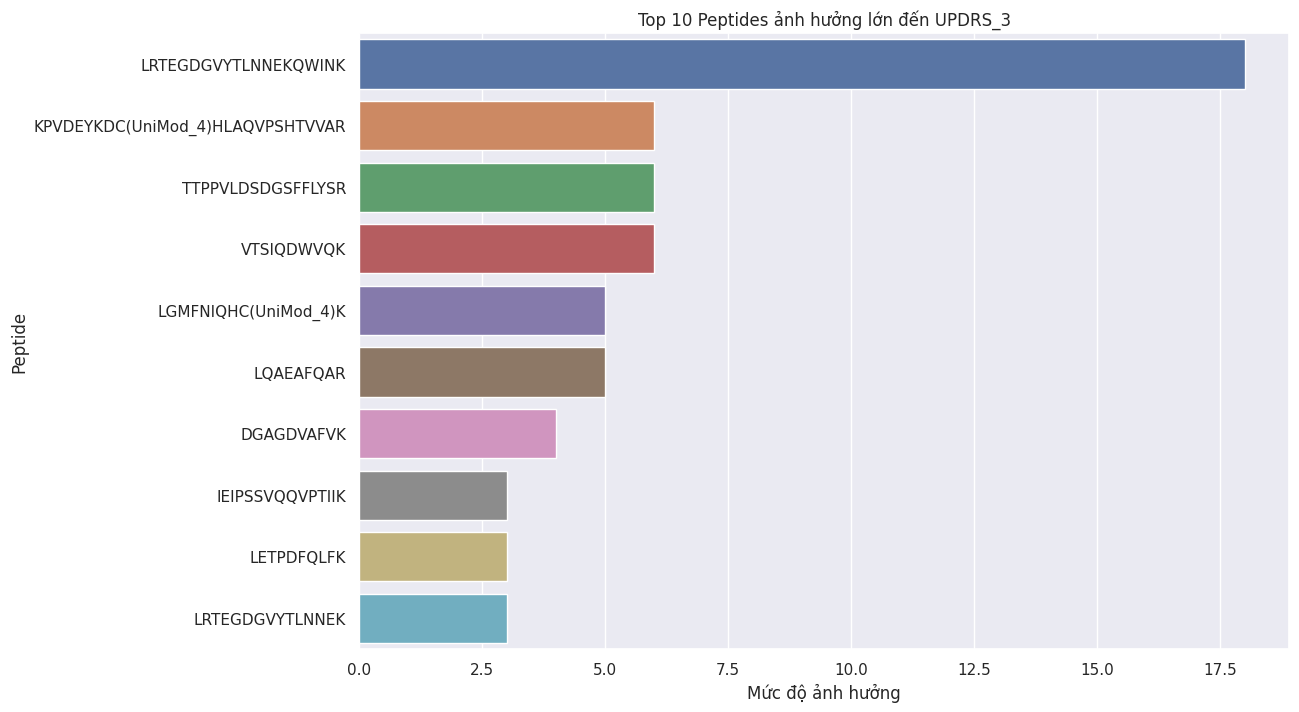

In [88]:
data = dict(sorted(peptides.items(), key=lambda item: item[1], reverse= True))
sns.barplot(x= list(data.values())[:10], y= list(data.keys())[:10])
plt.xlabel('Mức độ ảnh hưởng')
plt.ylabel('Peptide')
plt.title('Top 10 Peptides ảnh hưởng lớn đến UPDRS_3')

plt.show()

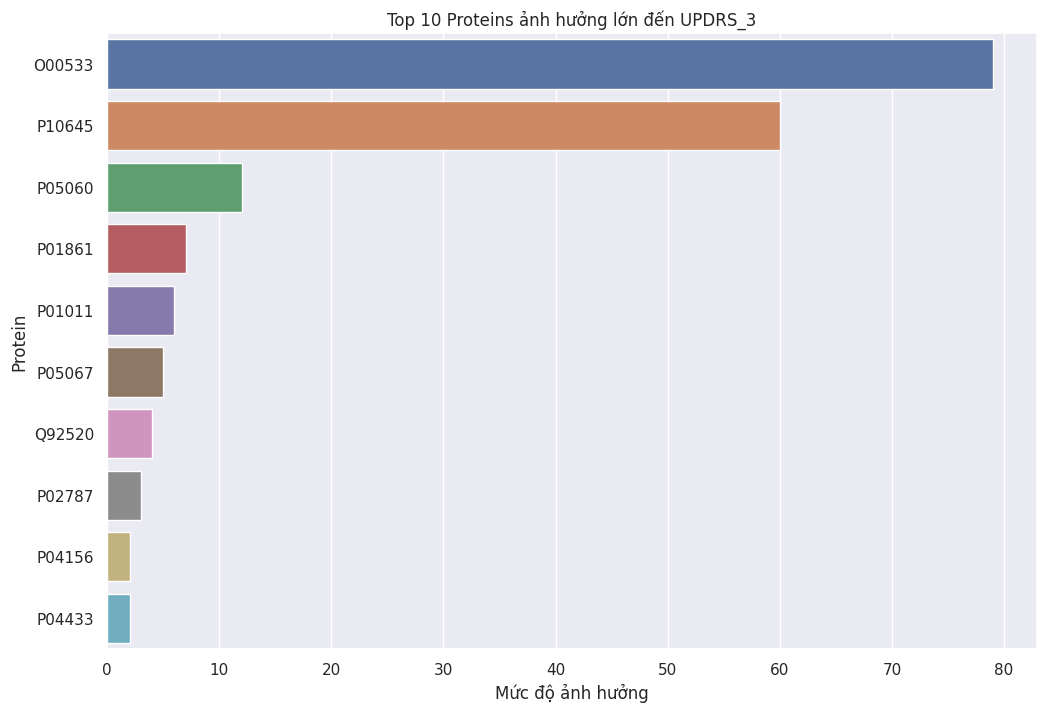

In [89]:
data = dict(sorted(proteins.items(), key=lambda item: item[1], reverse= True))
sns.barplot(x= list(data.values())[:10], y= list(data.keys())[:10])
plt.xlabel('Mức độ ảnh hưởng')
plt.ylabel('Protein')
plt.title('Top 10 Proteins ảnh hưởng lớn đến UPDRS_3')

plt.show()

## **UPDRS_4**

In [90]:
updrs_4_model = random_forest_model['updrs_4']
updrs_4_model

### **Trực quan hóa mô hình**

In [91]:
tfdf.model_plotter.plot_model_in_colab(updrs_4_model, tree_idx=0, max_depth= 5)

### **Đánh giá mô hình dựa với dữ liệu nằm ngoài túi (Out of bag - OOB)**

Tiến hành đánh giá mô hình với những dữ liệu không được chọn vào việc huấn luyện (nằm ngoài túi) với độ đọ RMSE để đánh giá mô hình.

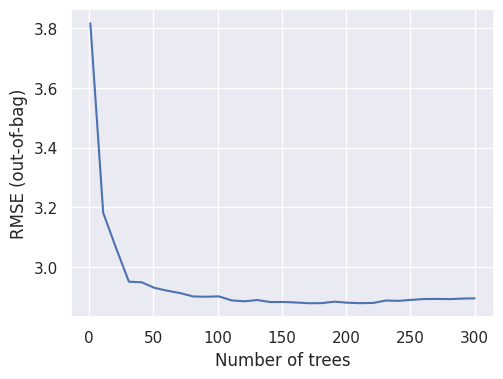

In [92]:
logs = updrs_4_model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel('Number of trees')
plt.ylabel('RMSE (out-of-bag)')

plt.show()

### **Ảnh hưởng của các Protein và Peptide đối với điểm UPDRS_4**

In [93]:
var_importances = updrs_4_model.make_inspector().variable_importances()["NUM_AS_ROOT"]
peptides = {}
proteins = {}

for s, impotace_val in var_importances:
    var = str(s[0]).split()[0].replace('"', '')
    if re.compile(r'.*UniMod_.*').match(var): peptides[var] = impotace_val
    elif re.compile(r'.[0-9]').match(var): proteins[var] = impotace_val
    else: peptides[var] = impotace_val

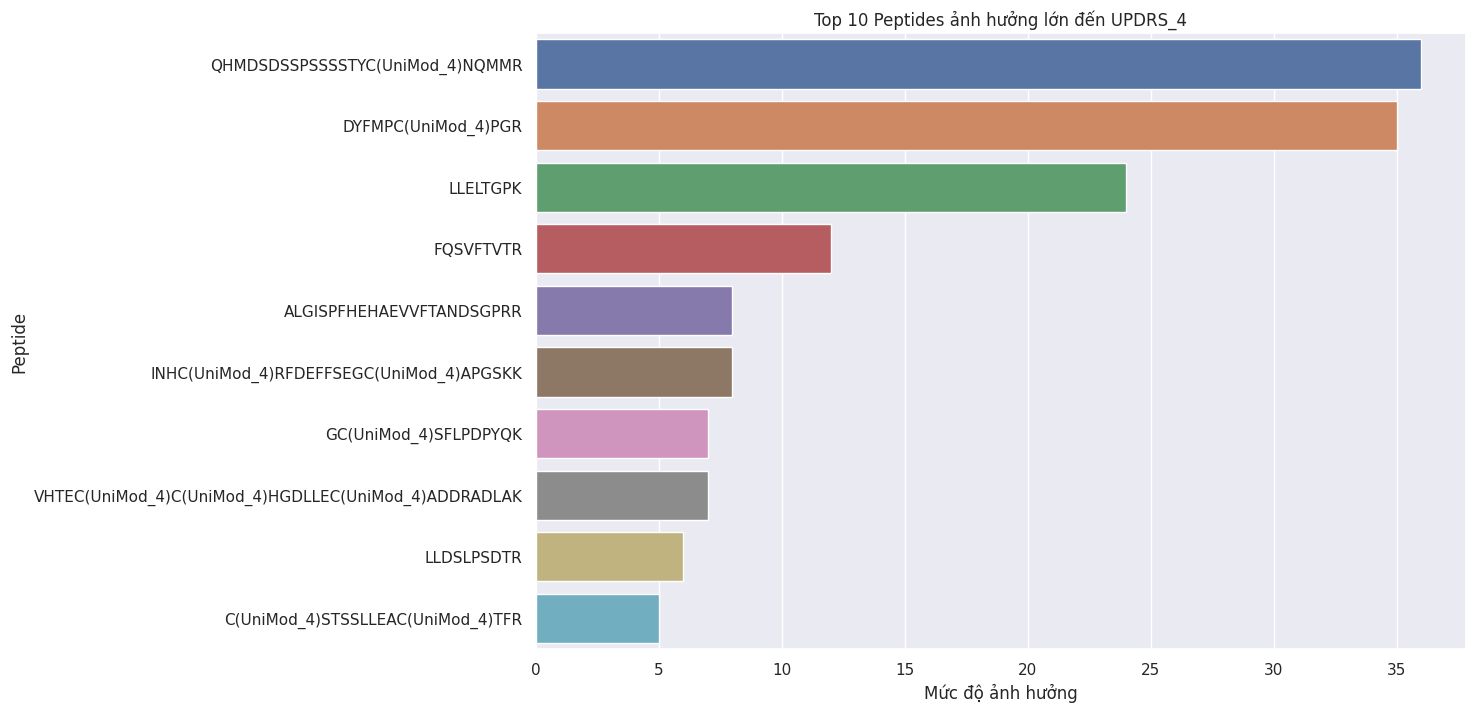

In [94]:
data = dict(sorted(peptides.items(), key=lambda item: item[1], reverse= True))
sns.barplot(x= list(data.values())[:10], y= list(data.keys())[:10])
plt.xlabel('Mức độ ảnh hưởng')
plt.ylabel('Peptide')
plt.title('Top 10 Peptides ảnh hưởng lớn đến UPDRS_4')

plt.show()

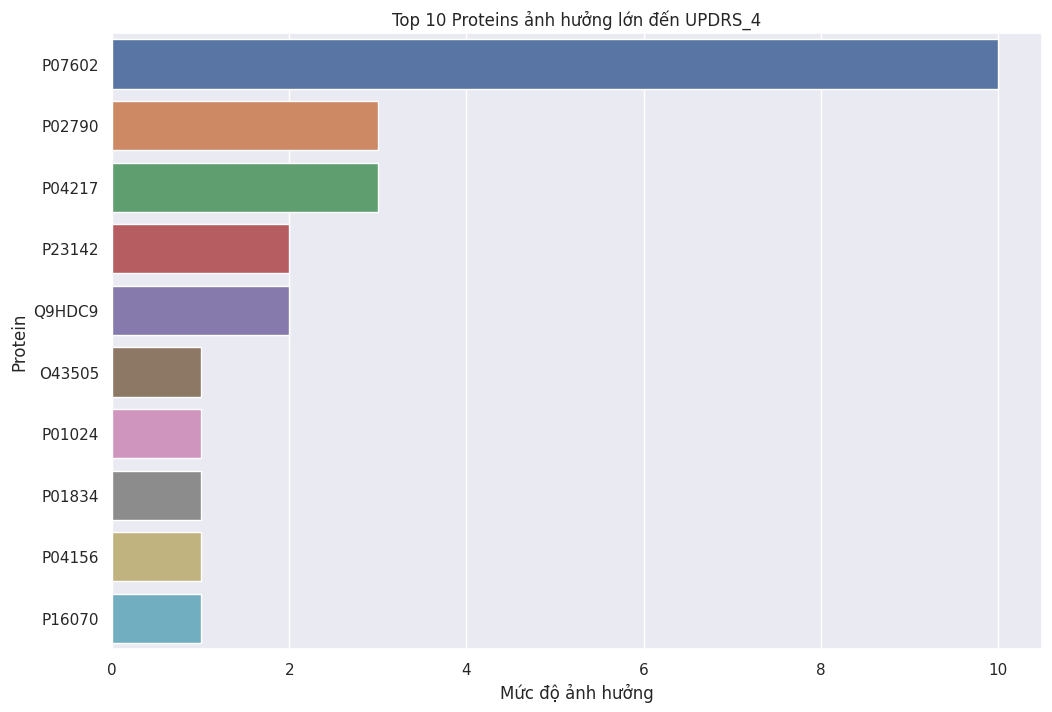

In [95]:
data = dict(sorted(proteins.items(), key=lambda item: item[1], reverse= True))
sns.barplot(x= list(data.values())[:10], y= list(data.keys())[:10])
plt.xlabel('Mức độ ảnh hưởng')
plt.ylabel('Protein')
plt.title('Top 10 Proteins ảnh hưởng lớn đến UPDRS_4')

plt.show()